In [1]:
#전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv > df_first
#주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210215.csv > df_last

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.rc("font", family="Malgun Gothic") # 한글 윈도우즈
plt.rc("axes", unicode_minus=False) # 축
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
#2
df_first = pd.read_csv('data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv',encoding='cp949')
df_last = pd.read_csv('data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210215.csv',encoding='cp949')

In [4]:
#3
df_last.isna().sum()
df_last["분양가격(㎡)"] = pd.to_numeric(df_last["분양가격(㎡)"], errors="coerce")
df_last.fillna(value=df_last.median(), inplace=True)
df_last.isna().sum()

지역명        0
규모구분       0
연도         0
월          0
분양가격(㎡)    0
dtype: int64

In [5]:
#4
df_last["평당분양가격"] = df_last["분양가격(㎡)"] * 3.3
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7


In [6]:
#5
df_last['규모구분'] = df_last['규모구분'].astype(str)
df_last['전용면적'] = [x.replace('전용면적 ','').replace('초과','~').replace('이하','') for x in df_last["규모구분"]]
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격,전용면적
0,서울,모든면적,2015,10,5841.0,19275.3,모든면적
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6,60㎡
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6,60㎡~ 85㎡
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3,85㎡~ 102㎡
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7,102㎡~


In [7]:
#6
df_last.drop(['규모구분','분양가격(㎡)'], axis=1, inplace=True)
df_last.head()

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~ 85㎡
3,서울,2015,10,18879.3,85㎡~ 102㎡
4,서울,2015,10,19400.7,102㎡~


In [8]:
#7
#1) 지역별 데이터 수
e1 = df_last.groupby(df_last.지역명).count()
df_last.pivot_table(index='지역명', aggfunc='count')

,연도,월,전용면적,평당분양가격
지역명,,,,
강원,320,320,320,320
경기,320,320,320,320
경남,320,320,320,320
경북,320,320,320,320
광주,320,320,320,320
대구,320,320,320,320
대전,320,320,320,320
부산,320,320,320,320
서울,320,320,320,320


In [9]:
#2) 지역별 평당분양가격 (평균)
e2 = df_last.groupby(df_last.지역명)['평당분양가격'].mean()
df_last.pivot_table(index='지역명', values = '평당분양가격', aggfunc='mean')

,평당분양가격
지역명,
강원,8470.672031
경기,13653.744844
경남,9603.134063
경북,8788.745625
광주,10601.105625
대구,12578.460469
대전,10282.299844
부산,12313.377656
서울,24633.948281


In [10]:
#3) 전용면적별 평당분양가격(평균)
e3 = df_last.groupby(df_last.전용면적)['평당분양가격'].mean()
df_last.pivot_table(index='전용면적', values='평당분양가격', aggfunc='mean')

,평당분양가격
전용면적,
102㎡~,11734.429963
60㎡,10727.923897
60㎡~ 85㎡,10669.271553
85㎡~ 102㎡,11340.139108
모든면적,10678.972886


In [11]:
#4) 지역별, 전용면적별 평당분양가격 (평균)
e4 = df_last.groupby([df_last['지역명'],df_last['전용면적']])['평당분양가격'].mean().unstack()
df_last.pivot_table(index=['지역명','전용면적'], values='평당분양가격', aggfunc='mean')

평당분양가격
지역명 전용면적                  
강원  102㎡~      9375.841406
    60㎡        8083.169531
    60㎡~ 85㎡   7886.458594
    85㎡~ 102㎡  9099.982031
    모든면적       7907.908594
...                    ...
충북  102㎡~      8407.136719
    60㎡        7334.842969
    60㎡~ 85㎡   7455.396094
    85㎡~ 102㎡  8548.160156
    모든면적       7420.178906

[85 rows x 1 columns]

In [12]:
#5) 연도, 지역별 평당분양가격(평균) – 힌트:unstack()
df_last.groupby(['연도','지역명'])['평당분양가격'].mean().unstack()
df_last.pivot_table(index='연도', columns = '지역명', values='평당분양가격', aggfunc='mean')

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.0600,11060.9400,8459.2200,7464.160,8709.3600,9018.9000,8532.1500,10377.4000,20315.6800,8765.0200,9367.600,10976.0200,6798.8800,7110.4000,8340.5300,7689.8800,6828.8000
2016,7527.6300,11684.9700,8496.7300,7753.405,9261.4500,10282.0300,9157.6375,10743.5350,21753.4350,8857.8050,9593.100,11099.0550,6936.6000,6906.6250,9595.0525,7958.2250,7133.3350
2017,7492.2925,12104.4275,8879.3925,8442.555,9666.1125,11821.9750,9950.2975,11422.1525,20836.6675,9209.0900,10436.360,11495.4125,7583.3725,7690.5675,12122.0000,8368.4150,7675.2225
2018,8219.2550,14258.4200,9327.6700,8843.120,9619.8025,12027.2075,10150.1675,12889.9650,23202.2450,10318.3575,10024.135,11749.3200,7929.8450,8174.5950,11596.3650,8343.1975,8149.2950
2019,8934.4750,15665.5400,10657.6525,9050.250,11521.4550,14081.6500,11848.2925,13537.8650,28286.8300,11089.2375,9961.930,13249.7750,8275.2450,8532.2600,11571.1200,8844.6325,7970.8750
2020,10275.4850,15106.0800,10817.1800,9977.825,13172.6100,15314.2000,10747.3300,13353.0100,29781.0150,10417.2750,12053.800,14982.9900,9584.7950,8559.4300,12689.7925,9202.6275,8410.2700
2021,11169.1800,14823.6000,11079.4200,11281.380,13445.5200,15640.0200,10226.0400,13565.6400,29303.3400,12502.3800,13574.550,15589.2000,9680.2200,8457.2400,13917.4200,9353.1900,8766.7800


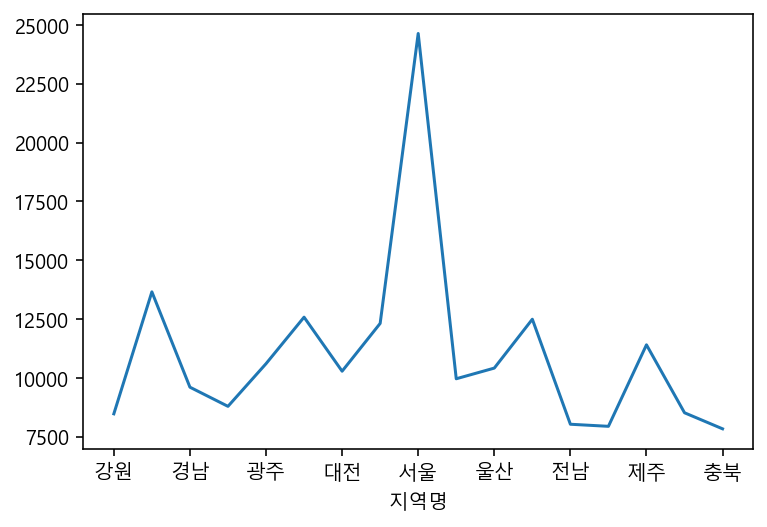

In [13]:
#8
df_last.groupby("지역명")["평당분양가격"].mean().plot()
plt.show()

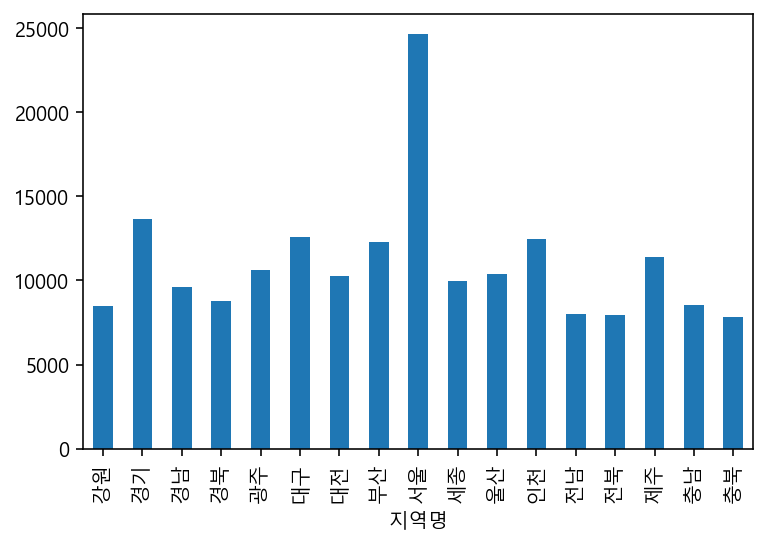

In [14]:
df_last.groupby("지역명")["평당분양가격"].mean().plot.bar()
plt.show()

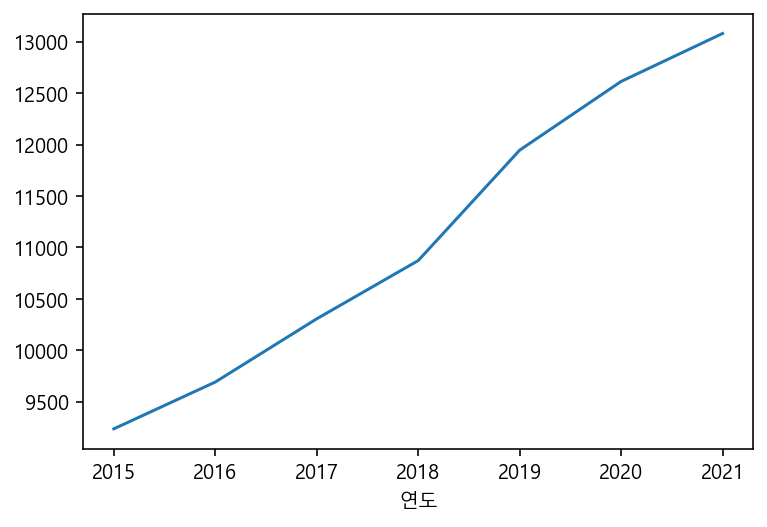

In [15]:
df_last.groupby("연도")["평당분양가격"].mean().plot()
plt.show()

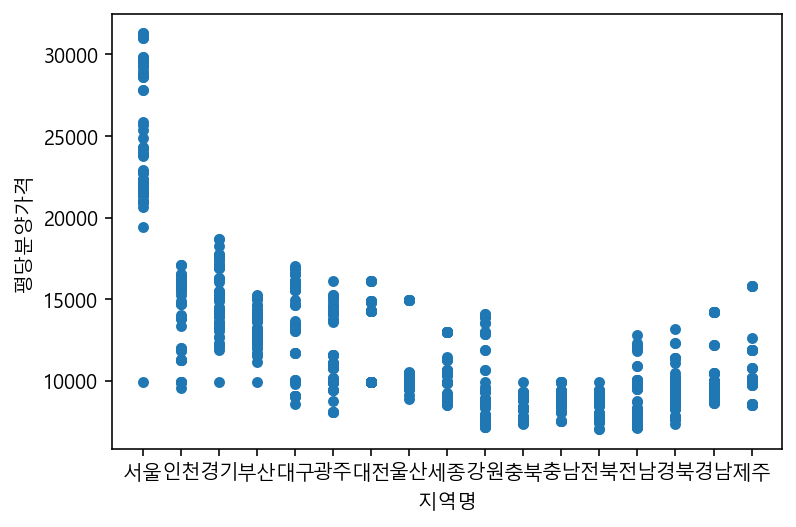

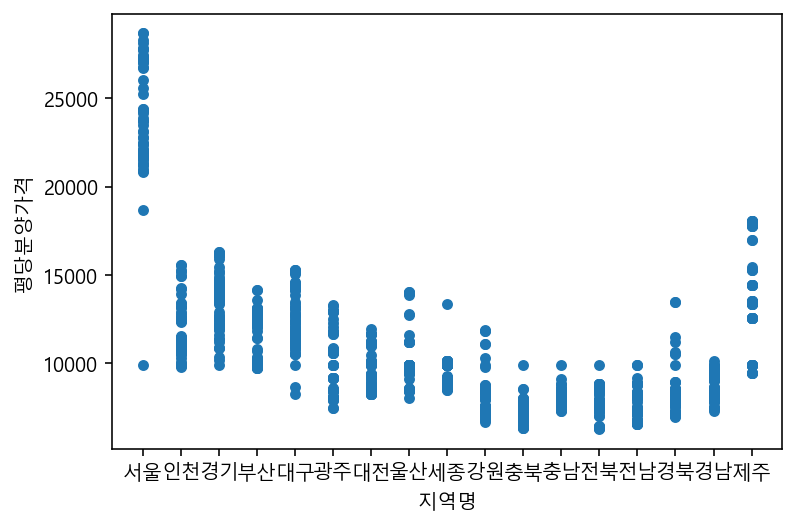

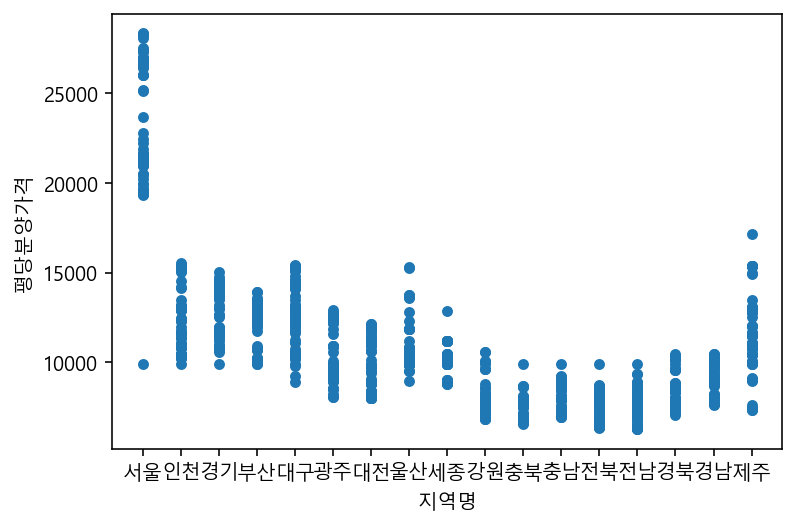

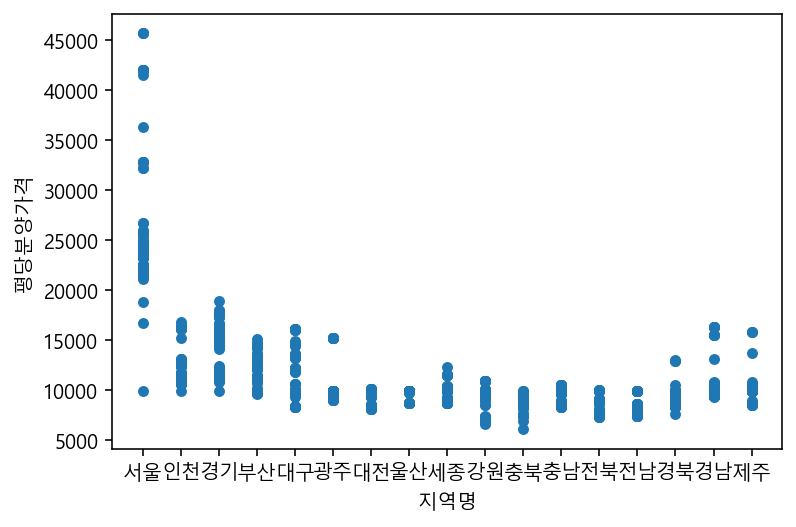

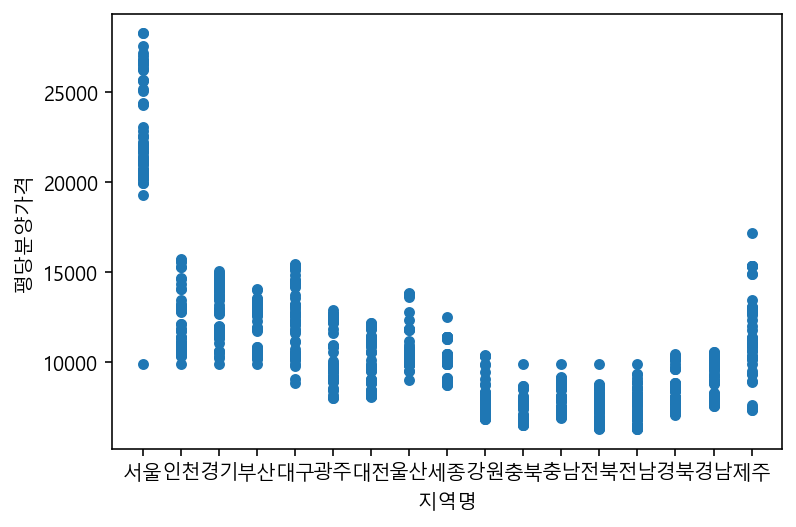

In [16]:
df_last.groupby('전용면적').plot.scatter(x='지역명', y='평당분양가격')
plt.show()

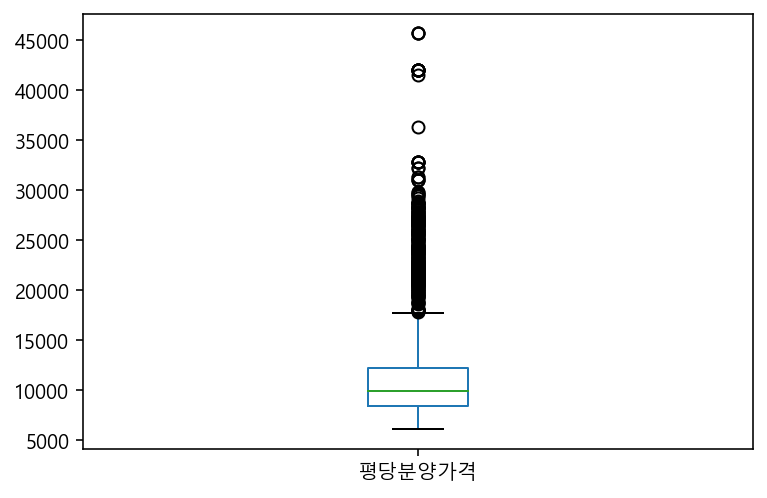

In [17]:
df_last.plot.box(x='전용면적', y='평당분양가격')
plt.show()

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

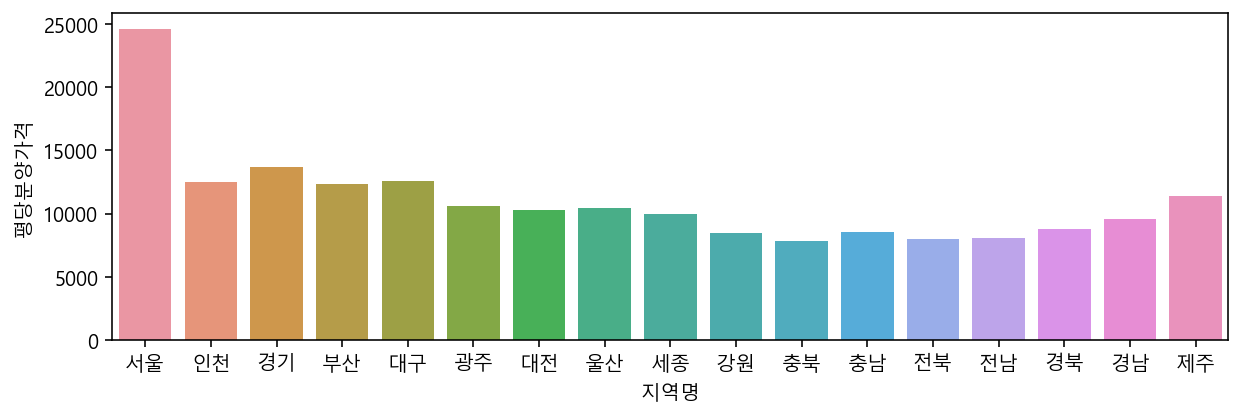

In [18]:
#9
plt.figure(figsize=(10,3))
sns.barplot(x="지역명",y="평당분양가격",data=df_last,ci=None)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

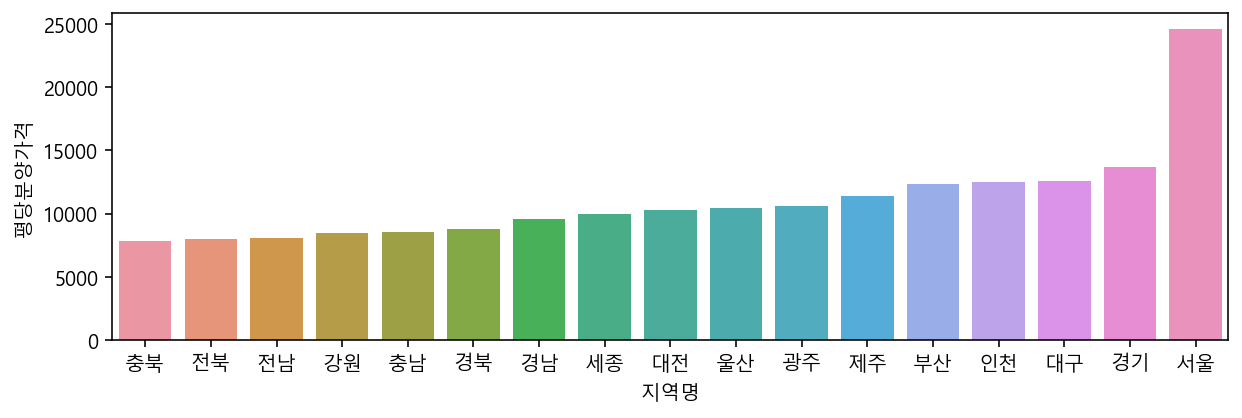

In [19]:
mean = df_last.groupby(['지역명'])['평당분양가격'].mean().sort_values().to_frame()
plt.figure(figsize=(10,3))
sns.barplot(data=mean, x=mean.index, y='평당분양가격')

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

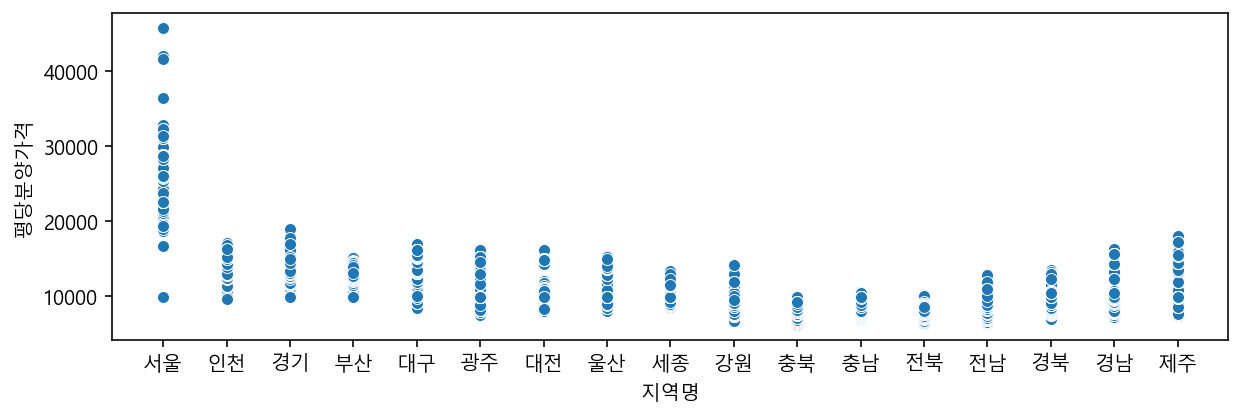

In [20]:
plt.figure(figsize=(10,3))
sns.scatterplot(x="지역명",y="평당분양가격",data=df_last)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

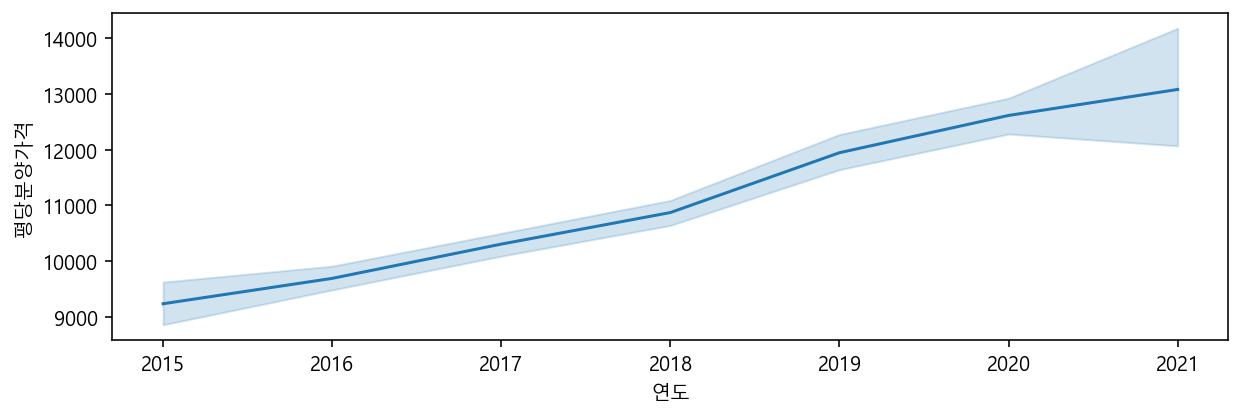

In [21]:
plt.figure(figsize=(10,3))
sns.lineplot(x="연도",y="평당분양가격",data=df_last)

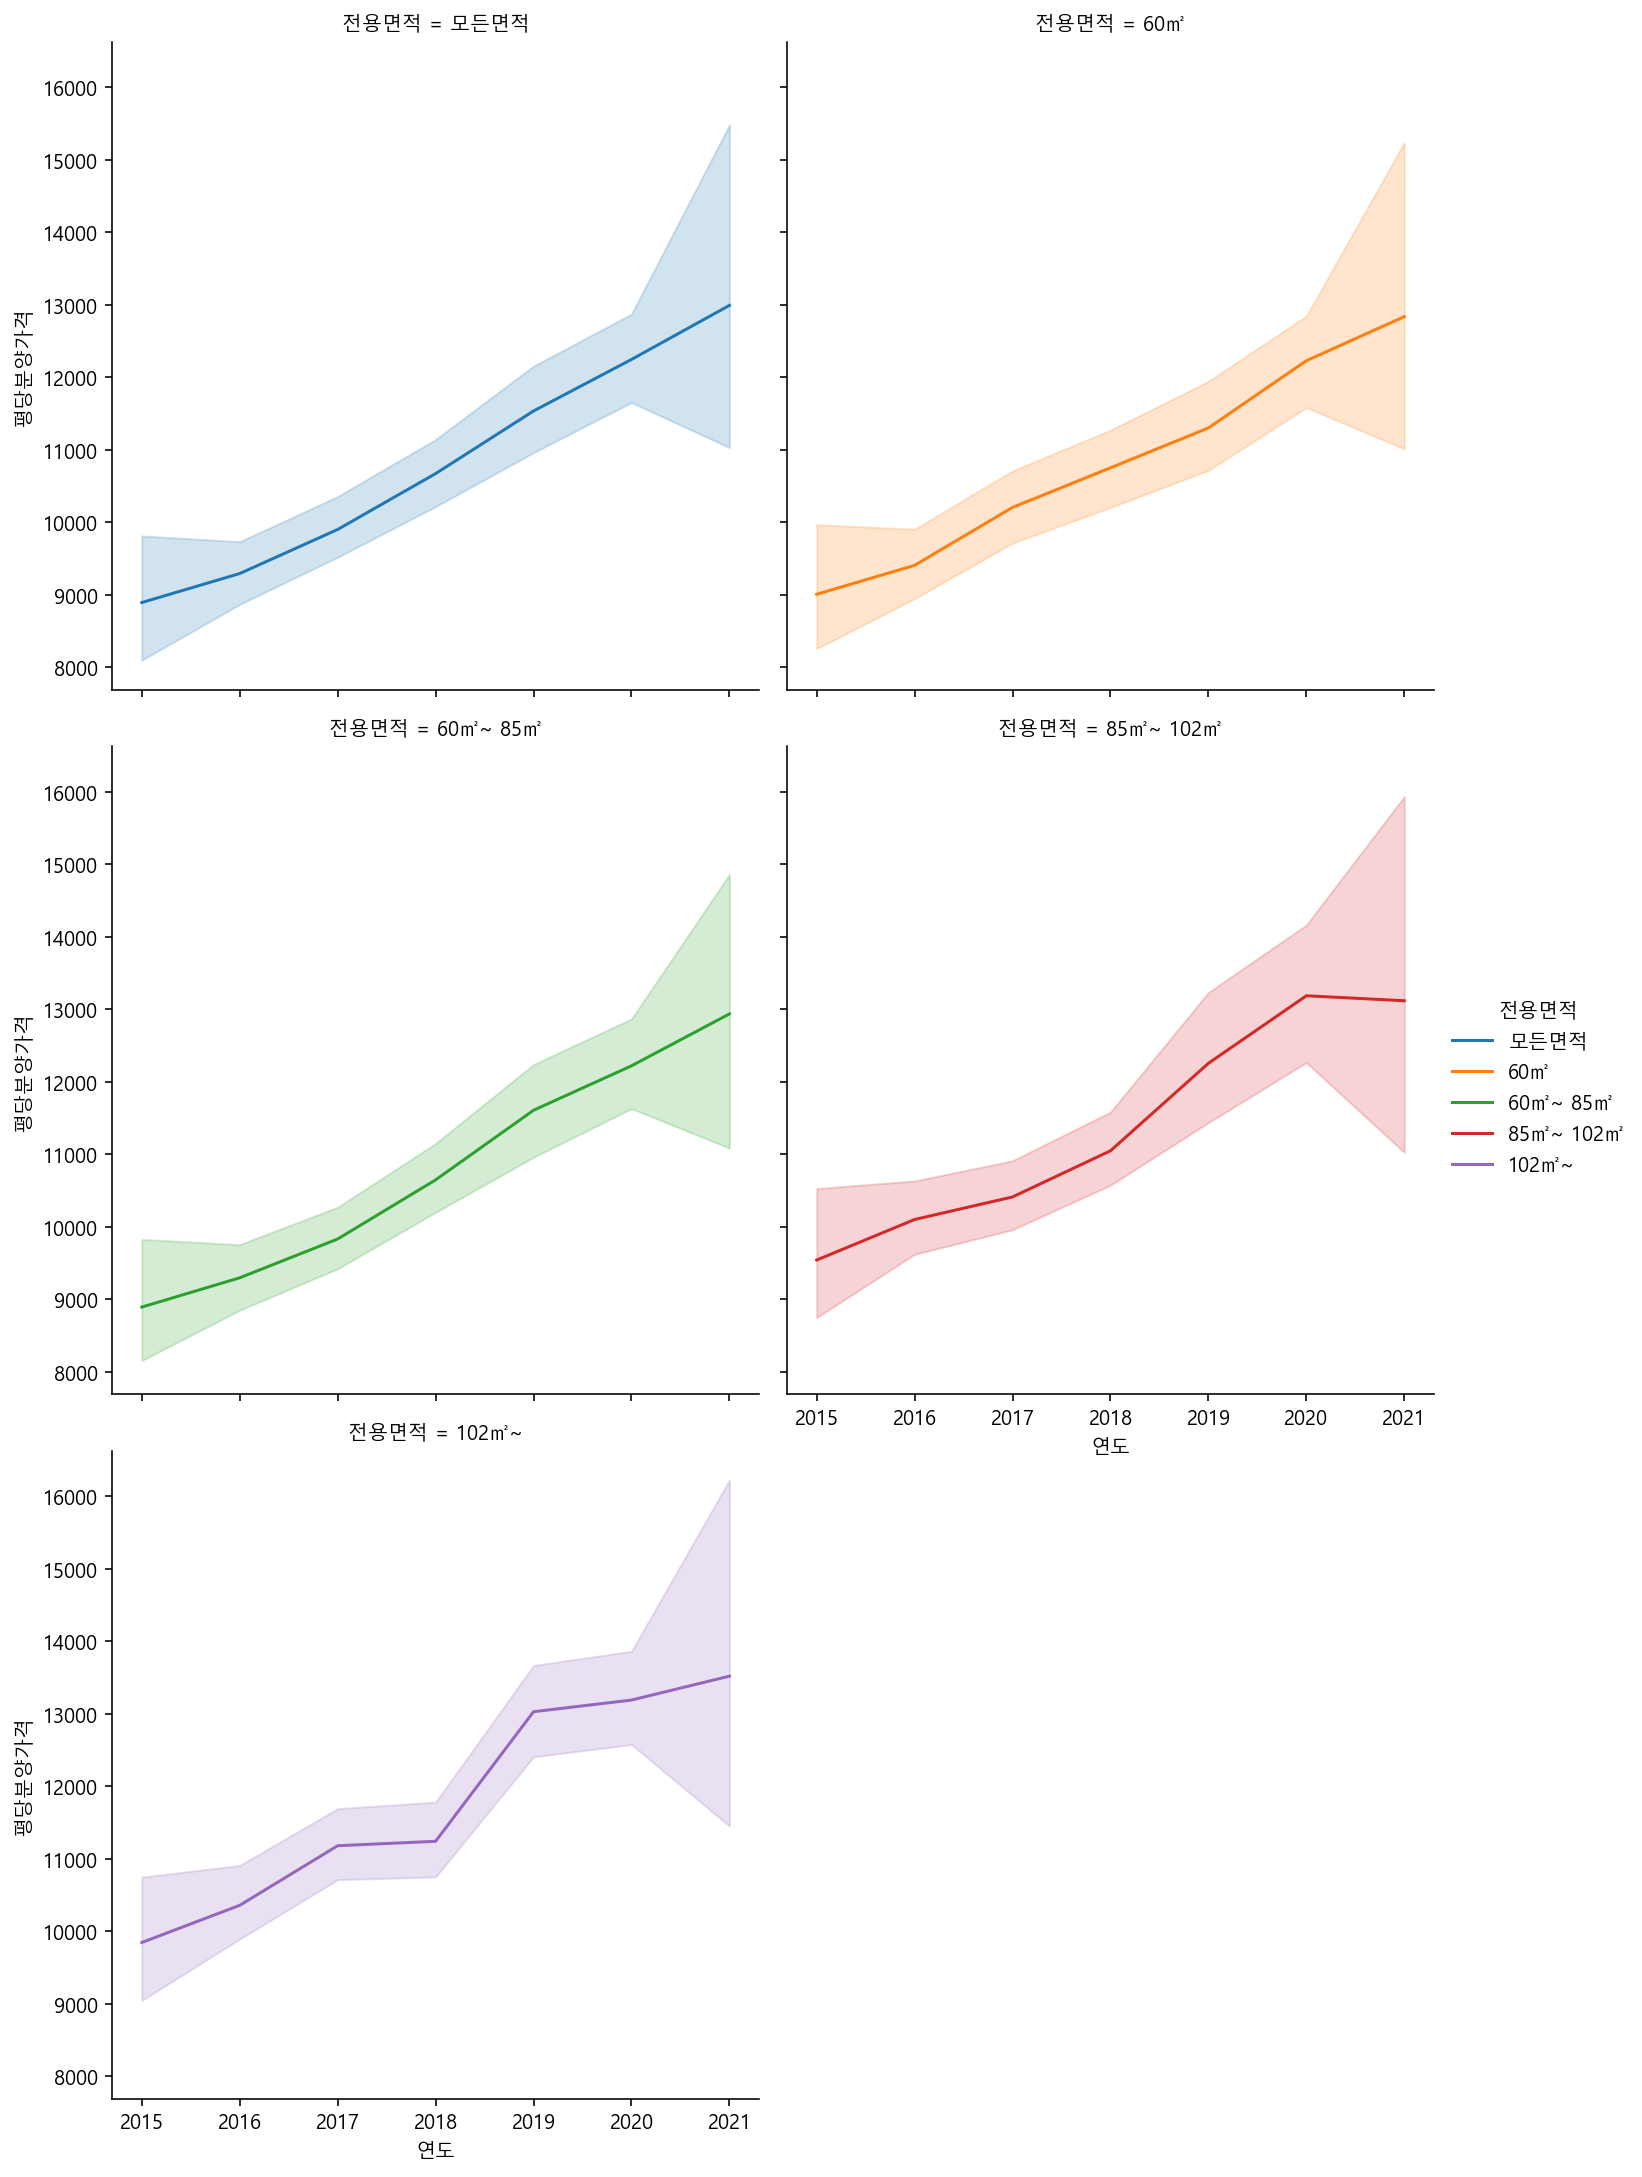

In [22]:
sns.relplot(x="연도",y="평당분양가격",data=df_last, hue="전용면적",kind="line",col="전용면적",col_wrap=2)

<AxesSubplot:xlabel='전용면적', ylabel='평당분양가격'>

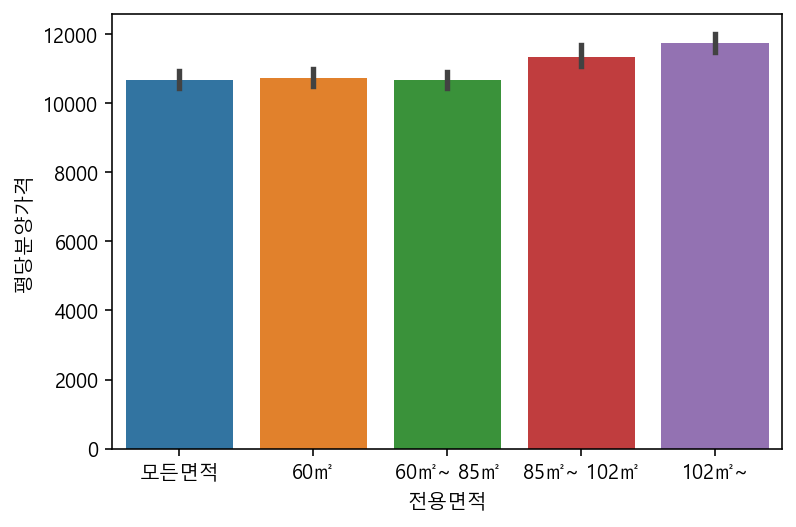

In [23]:
sns.barplot(x="전용면적",y="평당분양가격",data=df_last)

<Figure size 864x432 with 0 Axes>

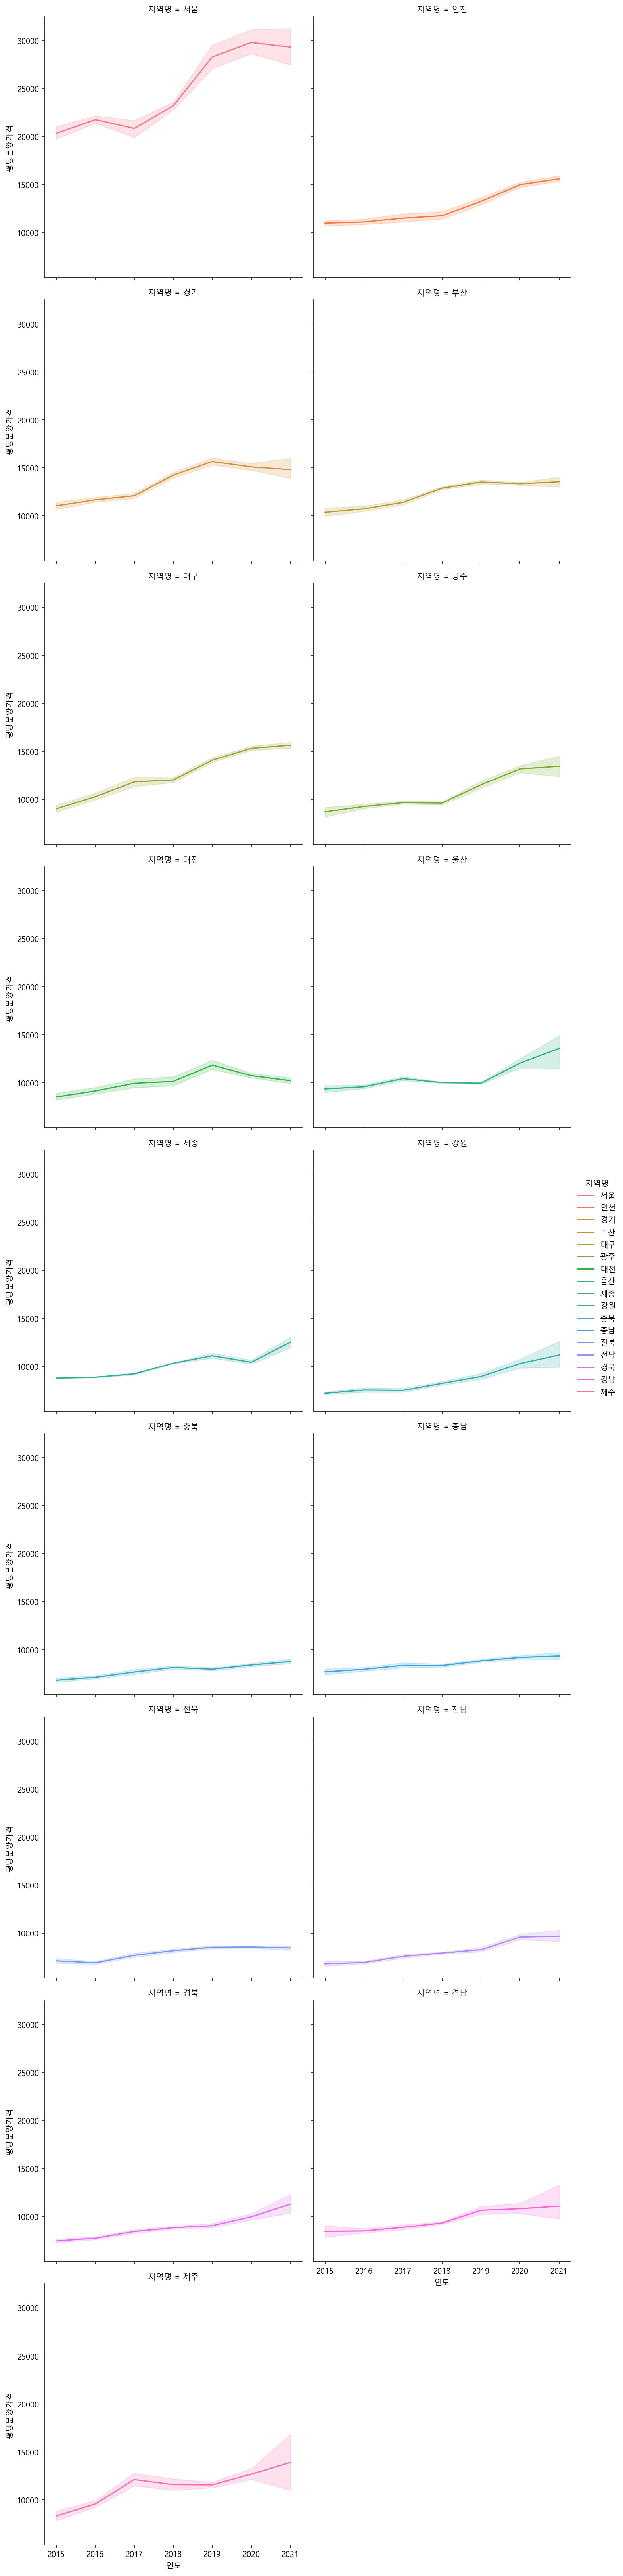

In [24]:
plt.figure(figsize=(12,6))
sns.relplot(kind='line', x="연도",y="평당분양가격",data=df_last, hue='지역명', col='지역명', col_wrap=2)

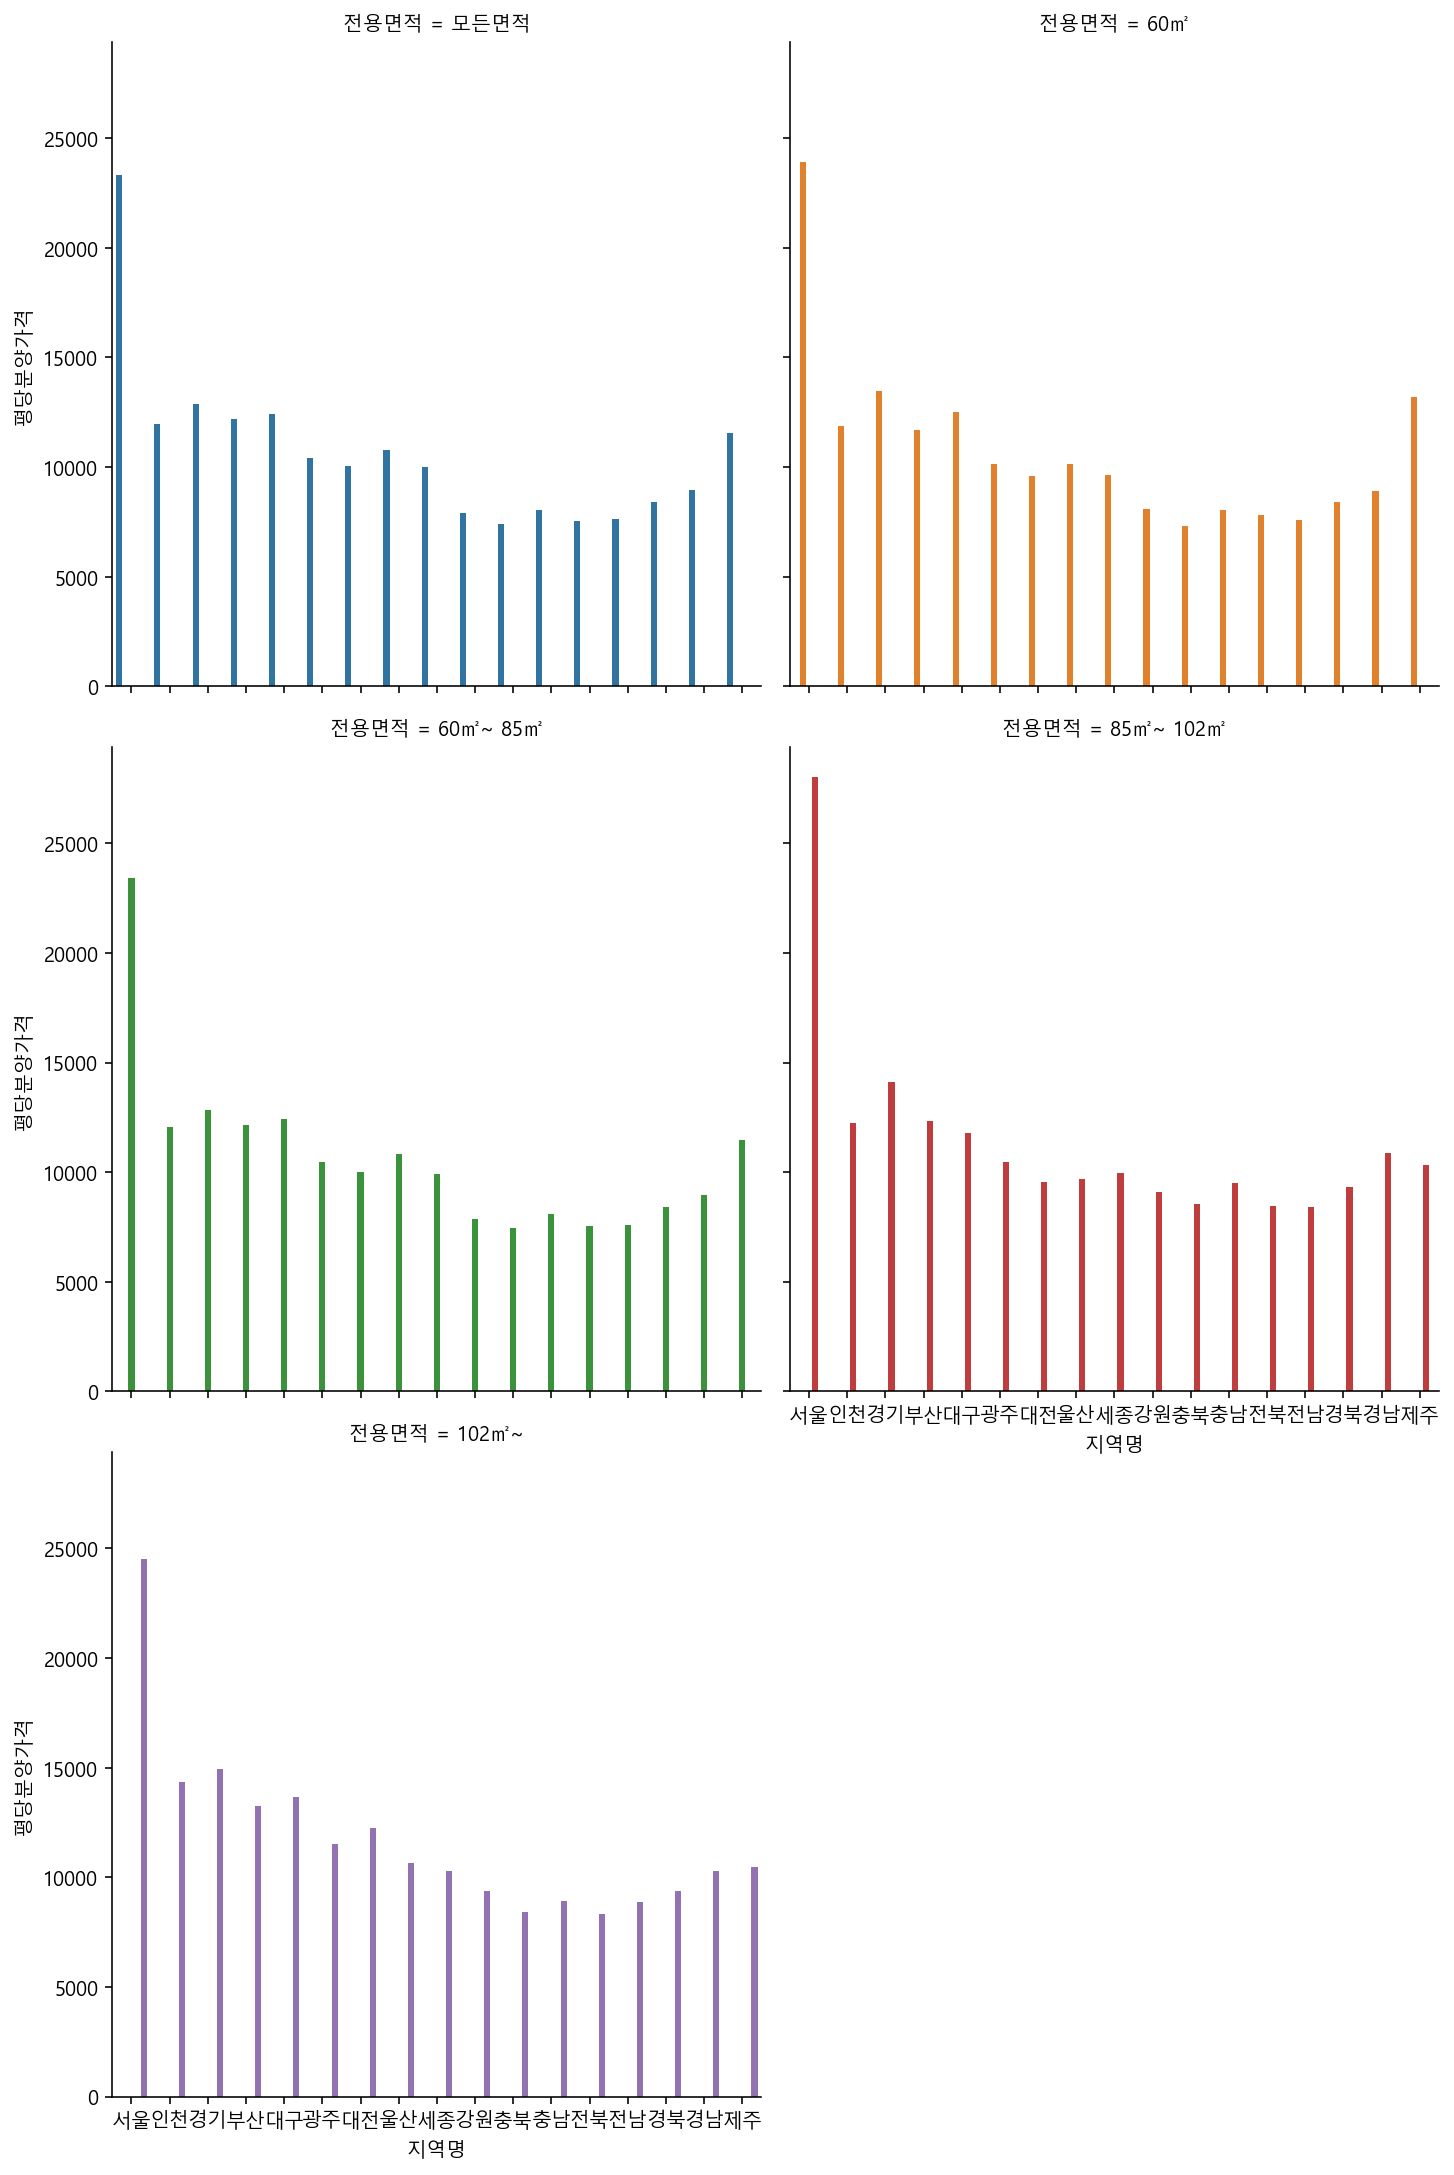

In [25]:
sns.catplot(x='지역명', y='평당분양가격', data=df_last, hue='전용면적', ci=None, kind='bar', col='전용면적', col_wrap=2)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

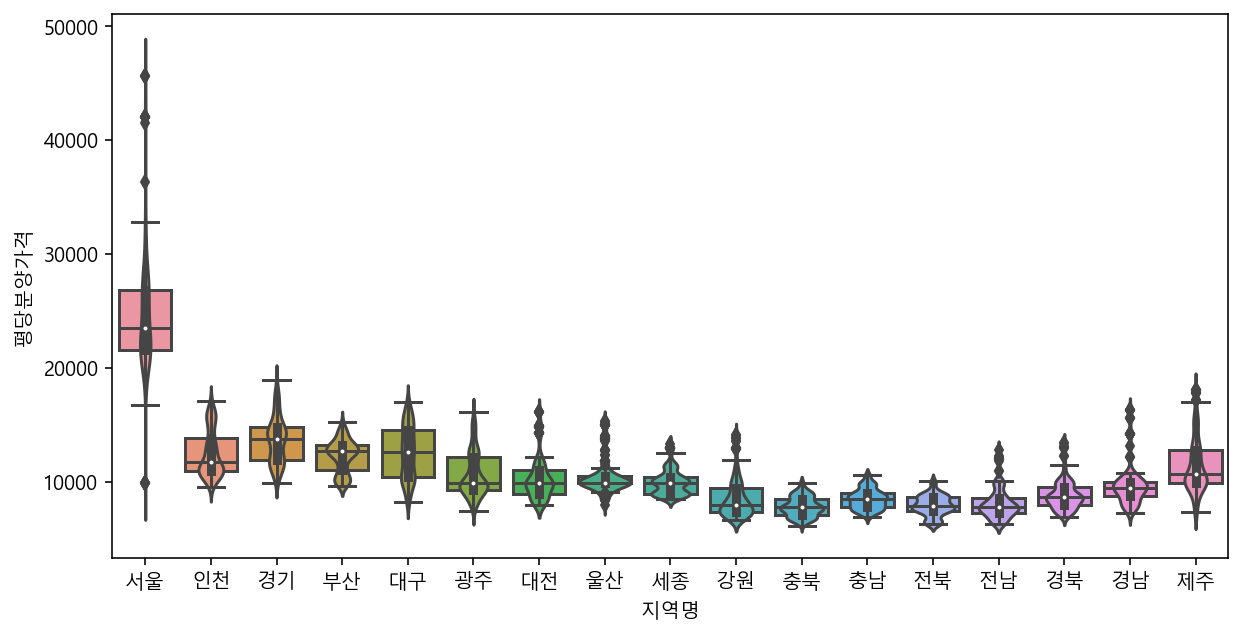

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x='지역명', y='평당분양가격', data=df_last)
sns.violinplot(x='지역명', y='평당분양가격', data=df_last)

<AxesSubplot:xlabel='전용면적', ylabel='평당분양가격'>

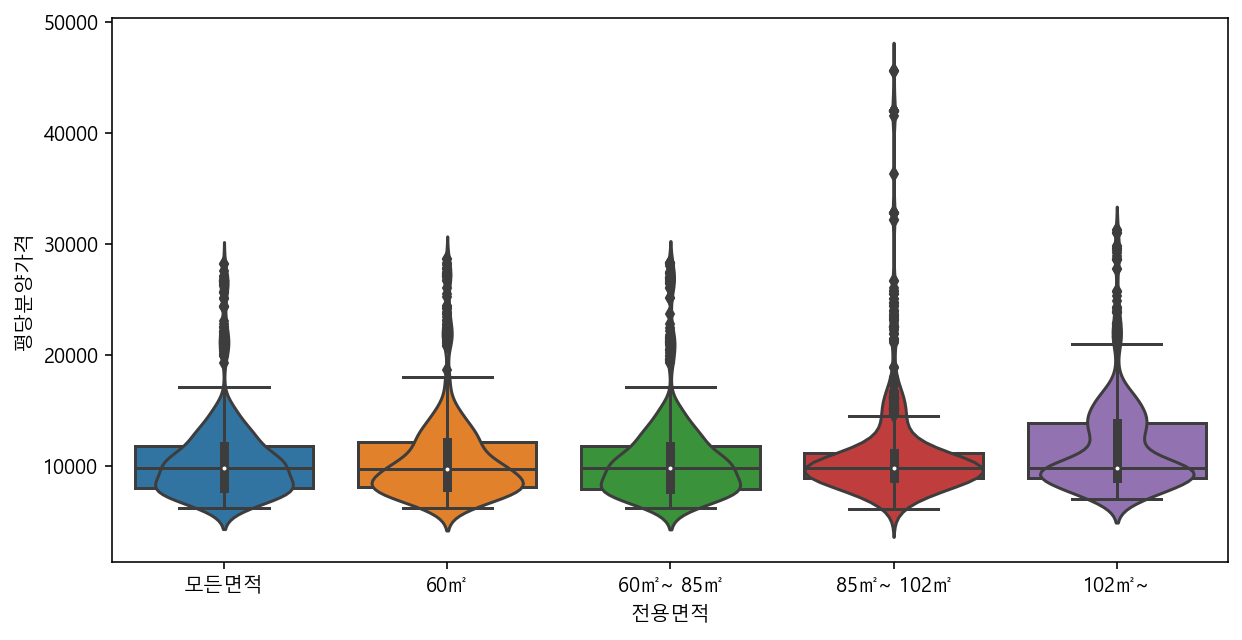

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x='전용면적', y='평당분양가격', data=df_last)
sns.violinplot(x='전용면적', y='평당분양가격', data=df_last)

<Figure size 720x360 with 0 Axes>

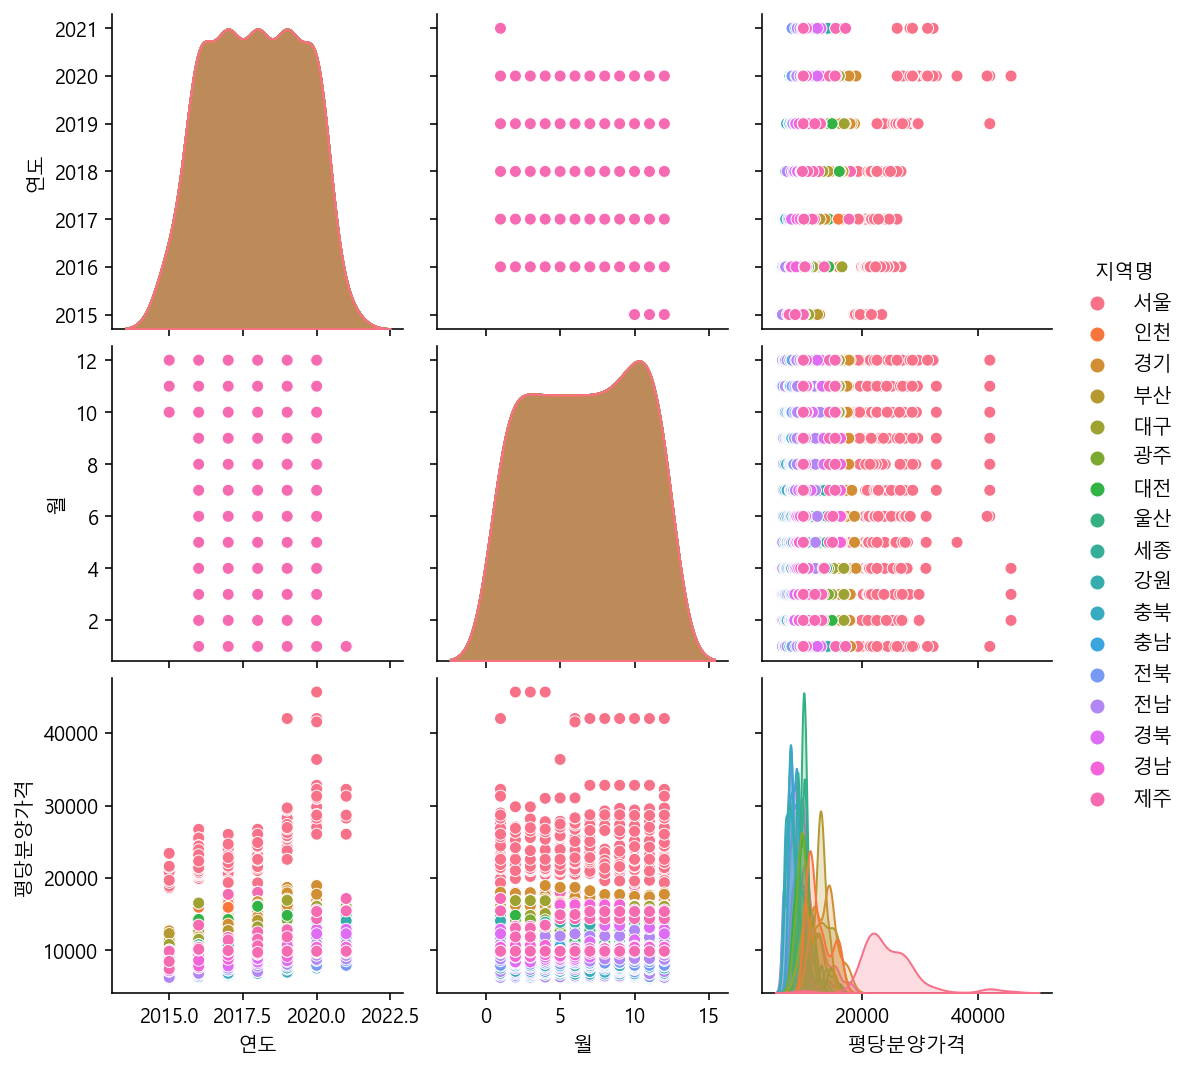

In [28]:
plt.figure(figsize=(10,5))
sns.pairplot(hue='지역명', data=df_last)

<Figure size 720x360 with 0 Axes>

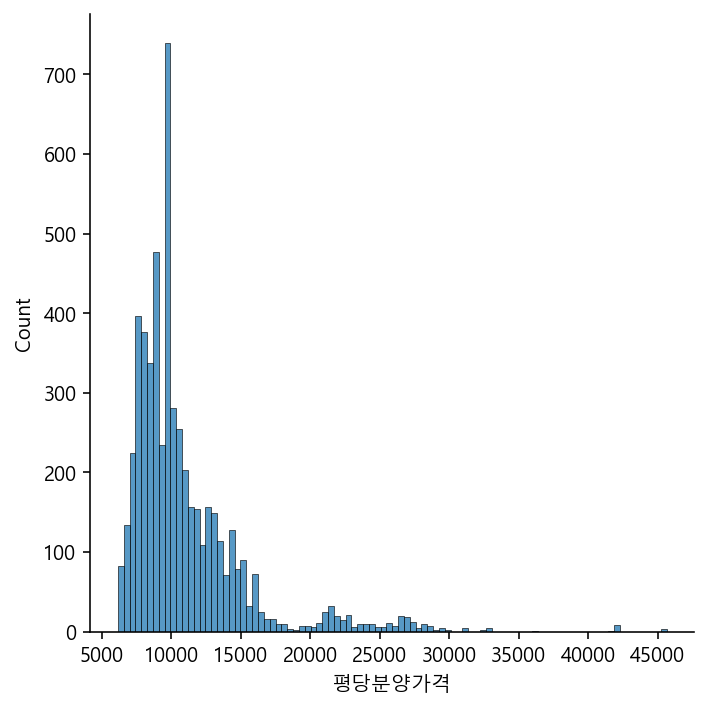

In [29]:
plt.figure(figsize=(10,5))
sns.displot(df_last['평당분양가격'])

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

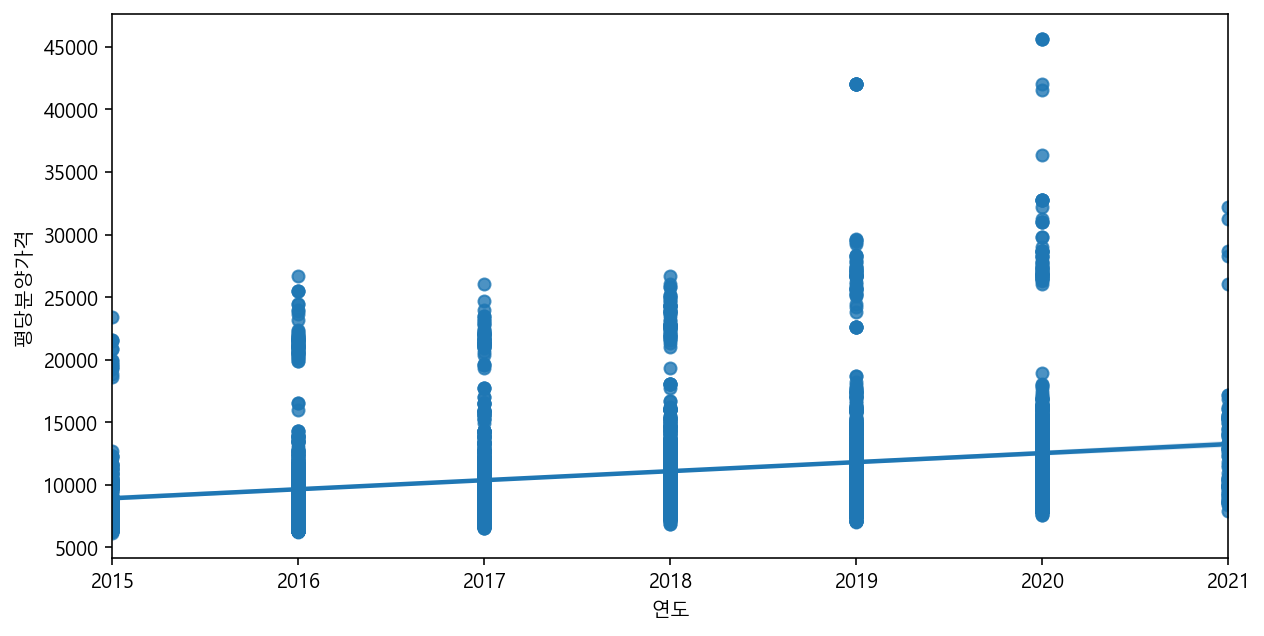

In [30]:
plt.figure(figsize=(10,5))
sns.regplot(x='연도', y='평당분양가격', data=df_last)

<AxesSubplot:>

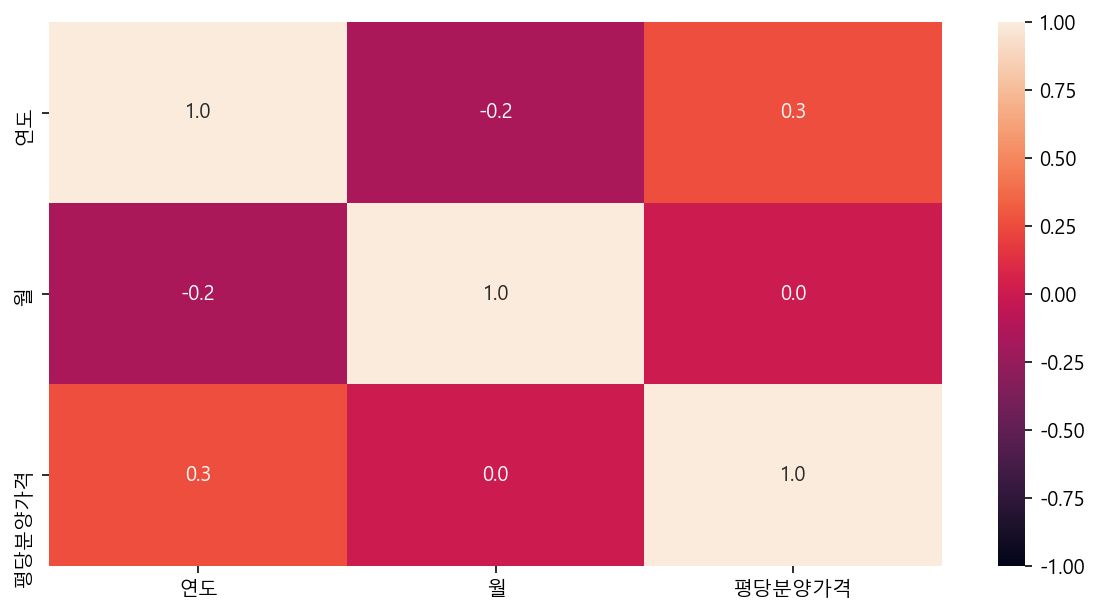

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(df_last.corr(), vmin=-1, vmax=1, annot=True, fmt=".1f")

In [32]:
#10
new_first = df_first.melt(id_vars="지역", var_name="연도월", value_name="평당분양가격")
new_first.columns = ['지역명', '연도월', '평당분양가격']
new_first['연도'] = new_first['연도월'].apply(lambda x:int(x.split('년')[0]))
new_first['월'] = new_first['연도월'].apply(lambda x:int(x.split('년')[-1].replace('월','')))
new_first.drop(['연도월'], axis=1, inplace=True)
new_last = df_last.loc[df_last.전용면적 == '모든면적']
result = pd.concat([new_first, new_last])
result

,지역명,평당분양가격,연도,월,전용면적
0,서울,18189.0,2013,12,NaN
1,부산,8111.0,2013,12,NaN
2,대구,8080.0,2013,12,NaN
3,인천,10204.0,2013,12,NaN
4,광주,6098.0,2013,12,NaN
...,...,...,...,...,...
5415,전북,8708.7,2021,1,모든면적
5420,전남,9329.1,2021,1,모든면적
5425,경북,10345.5,2021,1,모든면적
5430,경남,9860.4,2021,1,모든면적


In [33]:
result.isna().sum()
result.fillna('모든면적', inplace=True)
result.head()

,지역명,평당분양가격,연도,월,전용면적
0,서울,18189.0,2013,12,모든면적
1,부산,8111.0,2013,12,모든면적
2,대구,8080.0,2013,12,모든면적
3,인천,10204.0,2013,12,모든면적
4,광주,6098.0,2013,12,모든면적


In [34]:
#7.1
result.groupby(df_last.지역명).count()
result.pivot_table(index='지역명', aggfunc='count')

,연도,월,전용면적,평당분양가격
지역명,,,,
강원,85,85,85,85
경기,85,85,85,85
경남,85,85,85,85
경북,85,85,85,85
광주,85,85,85,85
대구,85,85,85,85
대전,85,85,85,85
부산,85,85,85,85
서울,85,85,85,85


In [35]:
#7.2
df_last.groupby(df_last.지역명)['평당분양가격'].mean()
df_last.pivot_table(index='지역명', values = '평당분양가격', aggfunc='mean')

,평당분양가격
지역명,
강원,8470.672031
경기,13653.744844
경남,9603.134063
경북,8788.745625
광주,10601.105625
대구,12578.460469
대전,10282.299844
부산,12313.377656
서울,24633.948281


In [36]:
#7.3
result.groupby(result.전용면적)['평당분양가격'].mean()
result.pivot_table(index='전용면적', values='평당분양가격', aggfunc='mean')

,평당분양가격
전용면적,
모든면적,10127.241176


In [37]:
#7.4 지역별, 전용면적별 평당분양가격 (평균)
result.groupby([result['지역명'],result['전용면적']])['평당분양가격'].mean().unstack()
result.pivot_table(index=['지역명','전용면적'], values='평당분양가격', aggfunc='mean')

,,평당분양가격
지역명,전용면적,
강원,모든면적,7552.813529
경기,모든면적,12307.114706
경남,모든면적,8508.114706
경북,모든면적,7990.460588
광주,모든면적,9747.066471
대구,모든면적,11425.282941
대전,모든면적,9587.854706
부산,모든면적,11447.455882
서울,모든면적,22243.458235


In [38]:
#7.5 연도, 지역별 평당분양가격(평균) – 힌트:unstack()
result.groupby([result['연도'],result['지역명']])['평당분양가격'].mean().unstack()
result.pivot_table(index=['연도','지역명'], values='평당분양가격', aggfunc='mean').unstack()

평당분양가격                                                          \
지역명             강원            경기            경남            경북            광주   
연도                                                                           
2013   6230.000000  10855.000000   6473.000000   6168.000000   6098.000000   
2014   6332.500000  10509.083333   6728.750000   6536.500000   7587.833333   
2015   6831.154545  10489.109091   7646.163636   7035.063636   7956.090909   
2016   7011.125000  11220.000000   7847.950000   7360.650000   8898.725000   
2017   7357.762500  11687.362500   8268.012500   7970.187500   9499.737500   
2018   7680.750000  13185.975000   9019.450000   8505.200000   9855.725000   
2019   8141.650000  14468.850000   9870.850000   8856.650000  11822.800000   
2020   9331.300000  14383.325000  10160.700000   9544.975000  12500.125000   
2021  10355.400000  14414.400000   9860.400000  10345.500000  12906.300000   

                                                                          \
지역명             대구            대전            부산          서울            세종   
연도                                                                         
2013   8080.000000   8321.000000   8111.000000  18189.0000   7601.000000   
2014   8286.083333   8240.333333   9180.166667  18997.2500   8085.333333   
2015   8706.718182   8104.509091   9633.272727  19282.6000   8641.227273   
2016  10310.025000   8501.625000  10429.925000  20663.5000   8860.500000   
2017  11326.012500   9115.837500  11437.937500  20419.4375   9198.887500   
2018  12075.800000  10180.225000  12997.875000  22889.3500  10354.850000   
2019  13852.025000  11777.700000  13116.400000  26131.0500  11078.925000   
2020  15145.075000  11094.050000  13247.575000  26910.1250  10626.825000   
2021  15354.900000  10579.800000  14038.200000  28267.8000  12533.400000   

                                                                          \
지역명             울산            인천           전남           전북            제주   
연도                                                                         
2013   8090.000000  10204.000000  5678.000000  6282.000000   7674.000000   
2014   8361.666667  10074.833333  5718.916667  6362.333333   7855.166667   
2015   9273.336364  10276.845455  6109.263636  6623.290909   7465.327273   
2016  10208.550000  10532.500000  6488.625000  6417.950000   9129.175000   
2017  11224.537500  10666.837500  7413.587500  7294.512500  10753.187500   
2018  10212.812500  11273.900000  7789.100000  7625.750000  11890.725000   
2019   9939.600000  12634.875000  7902.400000  8196.650000  12137.950000   
2020  12202.850000  14674.000000  8696.875000  8317.100000  14540.900000   
2021  13787.400000  15602.400000  9329.100000  8708.700000  17156.700000   

                                
지역명            충남           충북  
연도                              
2013  6365.000000  6589.000000  
2014  6681.583333  6620.000000  
2015  7024.490909  6699.572727  
2016  7330.675000  6770.225000  
2017  7659.712500  7023.912500  
2018  8012.675000  7874.075000  
2019  8606.950000  7574.600000  
2020  8856.100000  7959.600000  
2021  9111.300000  8527.200000

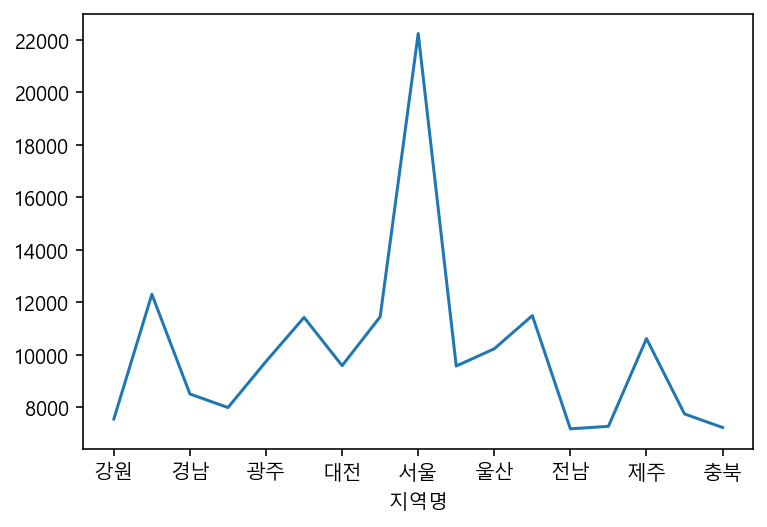

In [39]:
#8
result.groupby("지역명")["평당분양가격"].mean().plot()
plt.show()

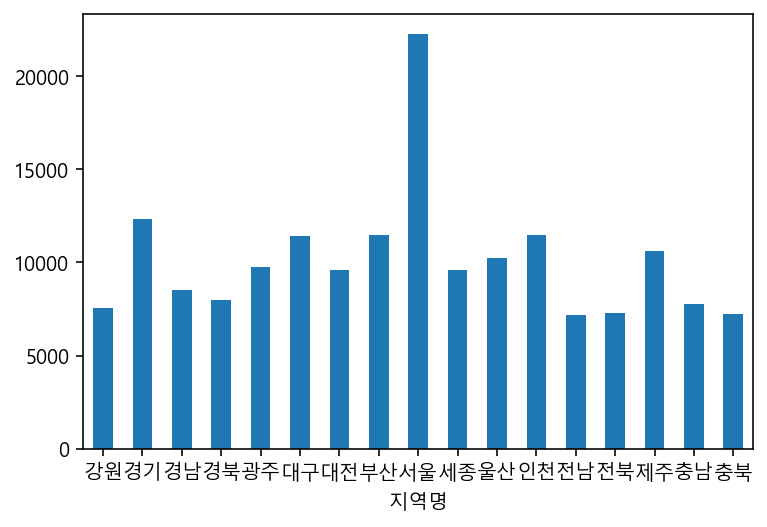

In [60]:
result.groupby("지역명")["평당분양가격"].mean().plot.bar(rot=0)
plt.show()

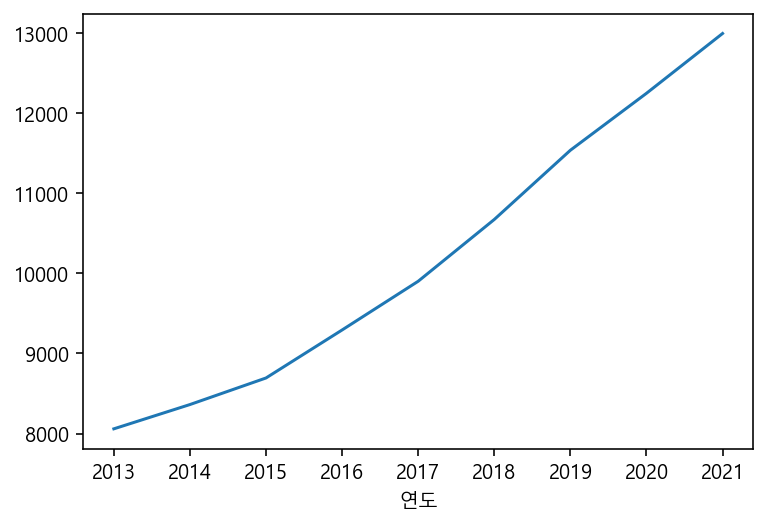

In [41]:
result.groupby("연도")["평당분양가격"].mean().plot()
plt.show()

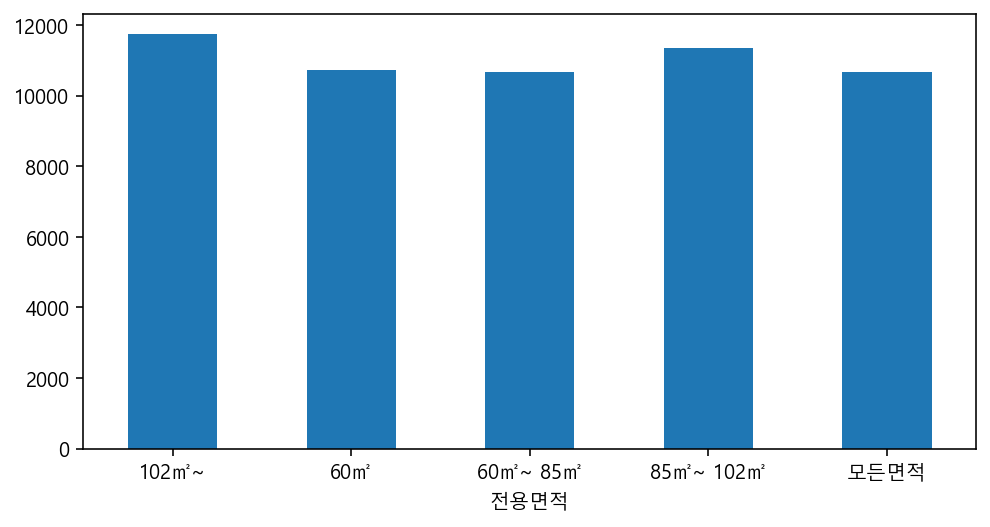

In [61]:
# 전용면적별 평균 평당분양가격 막대그래프 (위와 아래 같은 명령)
df_last.groupby("전용면적")["평당분양가격"].mean().plot(kind="bar", 
                                              rot=0, figsize=(8,4))
df_last.groupby("전용면적")["평당분양가격"].mean().plot.bar(rot=0, figsize=(8,4))
plt.show()

<AxesSubplot:xlabel='연도'>

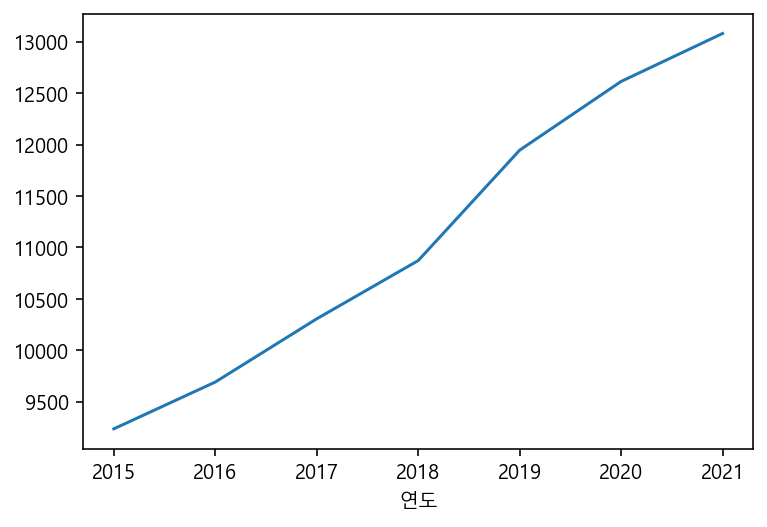

In [64]:
# 연도별 평당분양가격
df_last.groupby(["연도"])["평당분양가격"].mean().plot()

In [65]:
# 위의 경우, 연도와 평당분양가격이 양의 상관관계를 가지는 듯 하나 corr()의 상관계수 결과가 낮은 이유는 변수간 차원이 맞지 않아서 ★★★
df_last.loc[:,['연도','평당분양가격']].corr()

,연도,평당분양가격
연도,1.000000,0.260354
평당분양가격,0.260354,1.000000


            평당분양가격
연도                
2015   9235.470588
2016   9690.624706
2017  10305.665441
2018  10871.938971
2019  11945.828529
2020  12614.453824
2021  13080.889412


<AxesSubplot:>

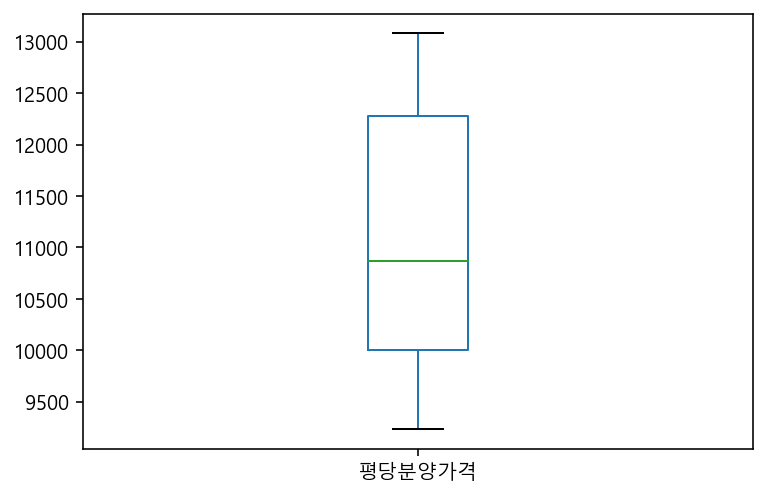

In [66]:
# 위의 연도별 월별 나온 평당분양가격의 boxplot
print(df_last.pivot_table(index="연도", values="평당분양가격"))
df_last.pivot_table(index="연도", values="평당분양가격").plot.box()

<AxesSubplot:>

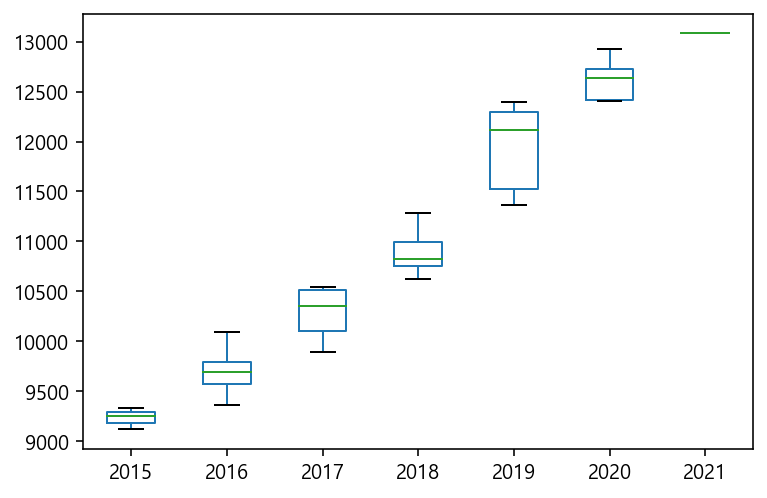

In [69]:
r = df_last.groupby(["월","연도"])["평당분양가격"].mean().unstack()
r.plot.box()

In [70]:
df_last.pivot_table(index="월",columns="연도", values="평당분양가격")

연도,2015,2016,2017,2018,2019,2020,2021
월,,,,,,,
1,NaN,9360.585882,10092.817059,10622.583529,11362.191176,12419.666471,13080.889412
2,NaN,9393.022941,10108.385294,10664.512941,11397.287647,12419.355882,NaN
3,NaN,9462.400588,10104.968824,10787.001176,11428.851176,12404.971765,NaN
4,NaN,9612.453529,10213.480588,10824.504706,11556.755294,12415.007647,NaN
5,NaN,9612.841765,10347.984706,10975.567059,11756.366471,12519.831176,NaN
6,NaN,9683.888824,10419.070588,10825.591765,12107.350588,12667.865294,NaN
7,NaN,9707.532353,10526.553529,10765.667647,12127.616471,12596.740588,NaN
8,NaN,9725.352353,10541.345294,10714.498235,12215.008235,12678.483529,NaN
9,NaN,9743.327647,10535.230588,10831.512353,12280.115294,12719.131765,NaN


<AxesSubplot:>

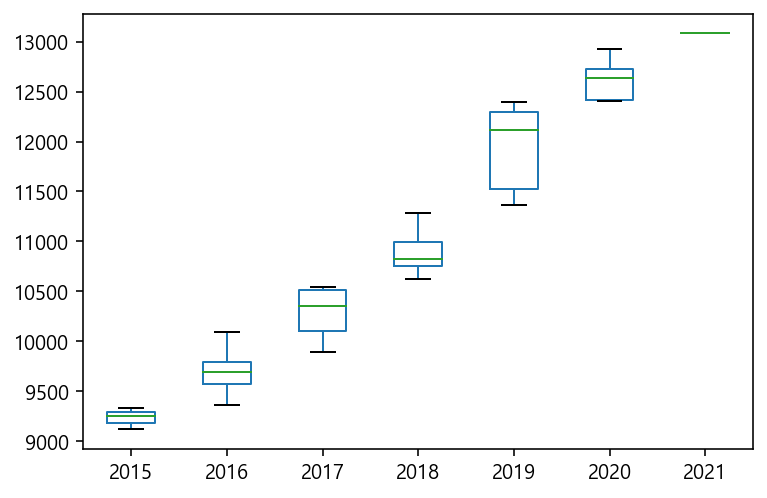

In [71]:
df_last.pivot_table(index="월",columns="연도", values="평당분양가격").plot.box()

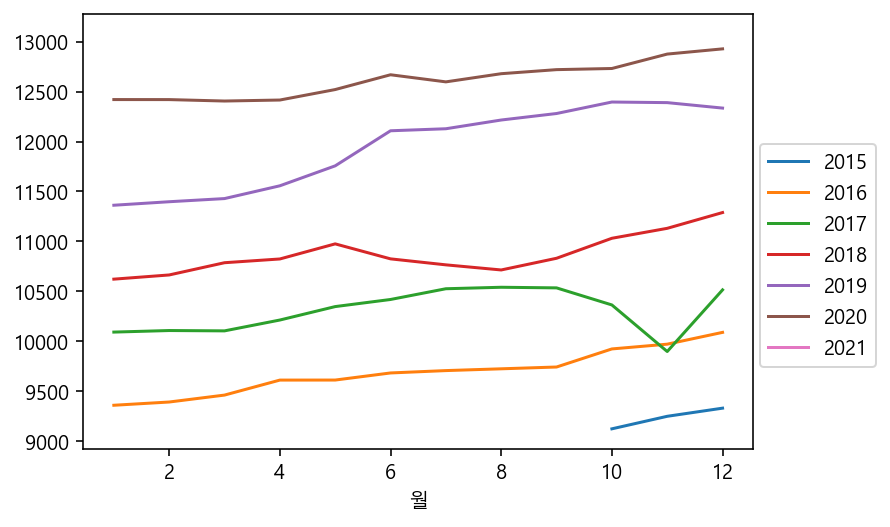

In [72]:
# 연도별 월별 평당분양가격의 추이
df_last.pivot_table(index="월",columns="연도", values="평당분양가격").plot()
plt.legend(bbox_to_anchor=(1.01, 0.7), loc=0, borderaxespad=0.)

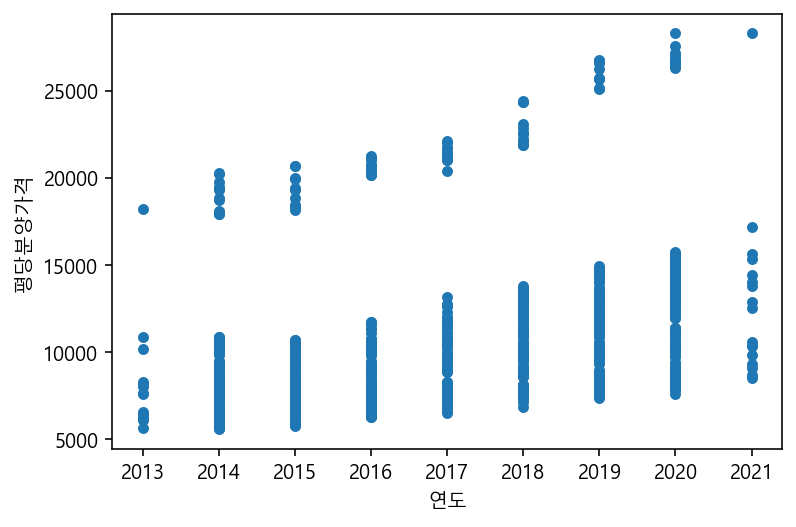

In [42]:
result.groupby('전용면적').plot.scatter(x='연도', y='평당분양가격')
plt.show()

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

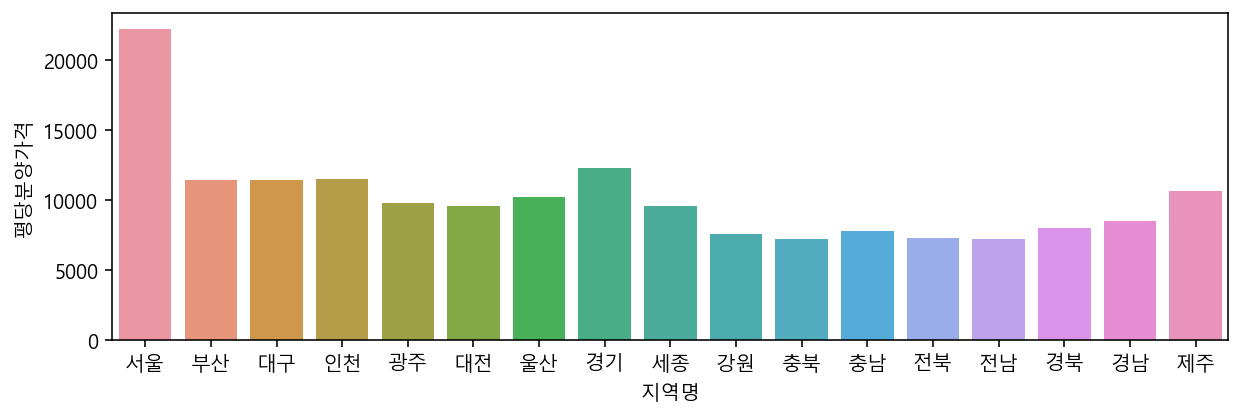

In [43]:
#9
plt.figure(figsize=(10,3))
sns.barplot(x="지역명",y="평당분양가격",data=result,ci=None)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

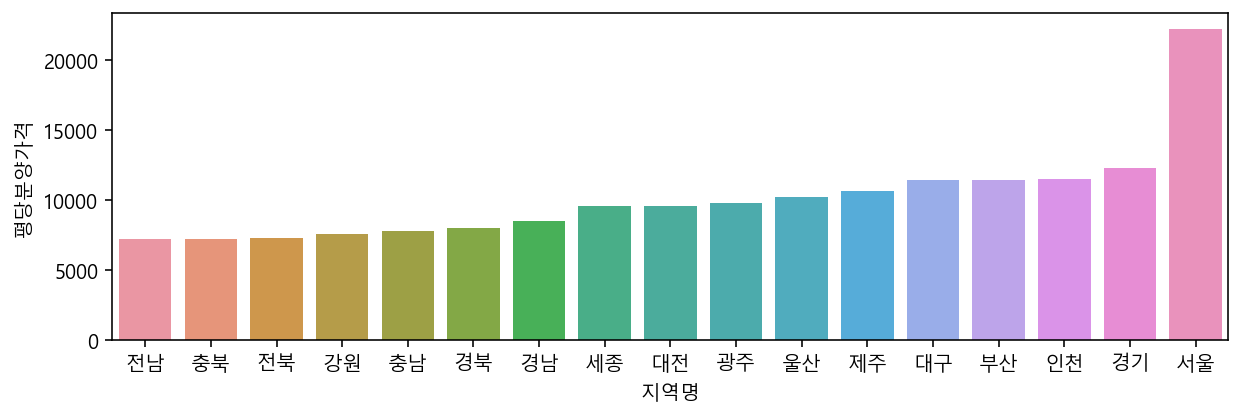

In [44]:
mean = result.groupby(['지역명'])['평당분양가격'].mean().sort_values().to_frame()
plt.figure(figsize=(10,3))
sns.barplot(data=mean, x=mean.index, y='평당분양가격')

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

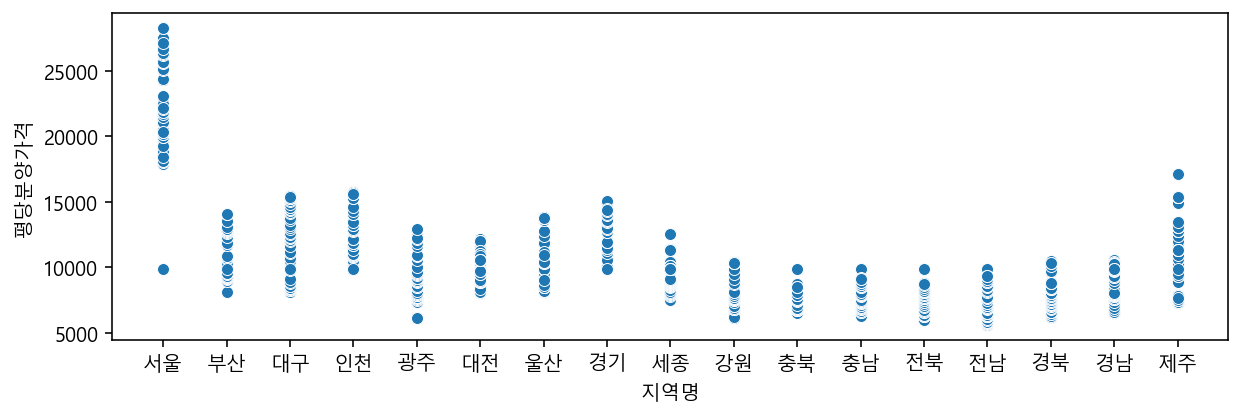

In [45]:
plt.figure(figsize=(10,3))
sns.scatterplot(x="지역명",y="평당분양가격",data=result)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

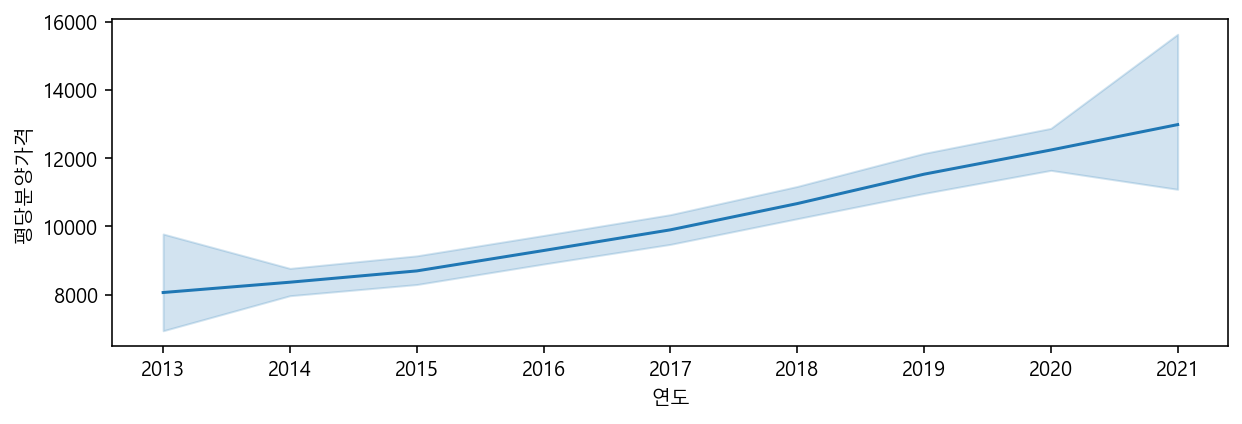

In [46]:
plt.figure(figsize=(10,3))
sns.lineplot(x="연도",y="평당분양가격",data=result)

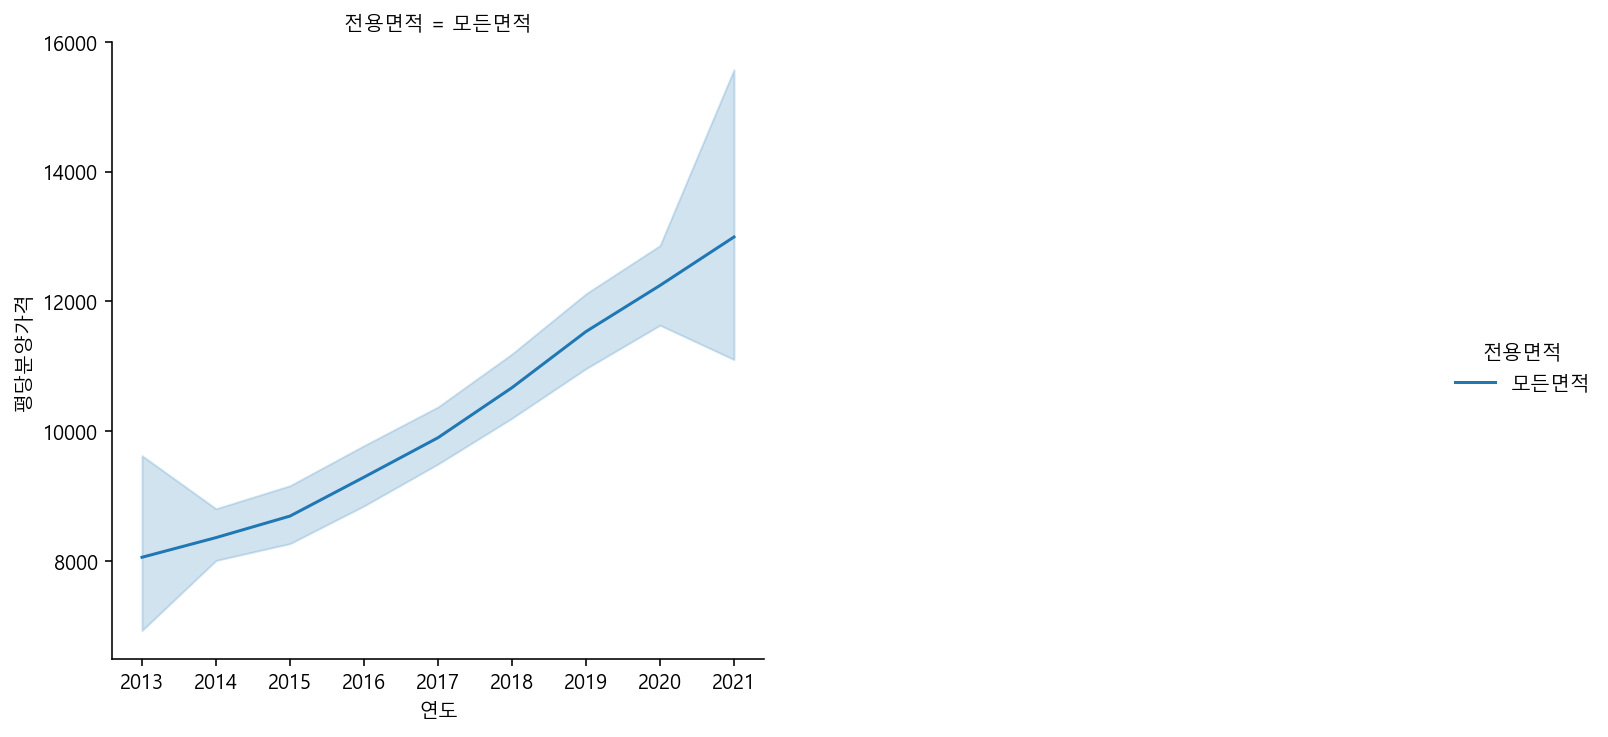

In [47]:
sns.relplot(x="연도",y="평당분양가격",data=result, hue="전용면적",kind="line",col="전용면적",col_wrap=2)

<AxesSubplot:xlabel='지역명', ylabel='count'>

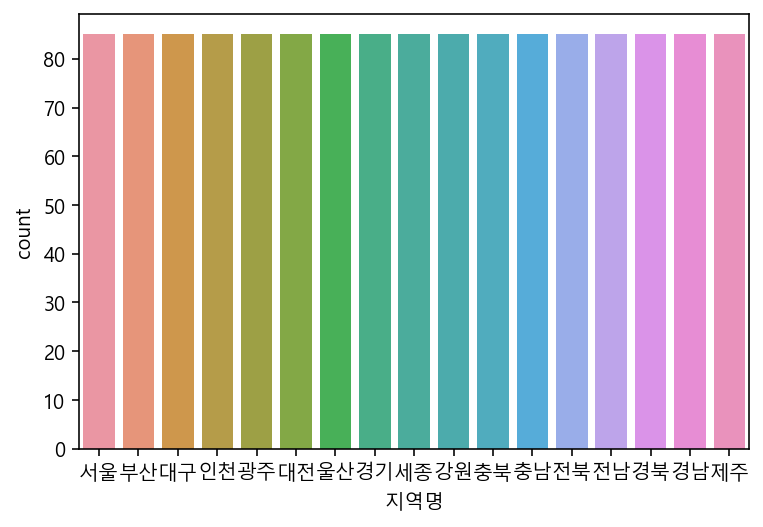

In [48]:
sns.countplot(x="지역명",data=result)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

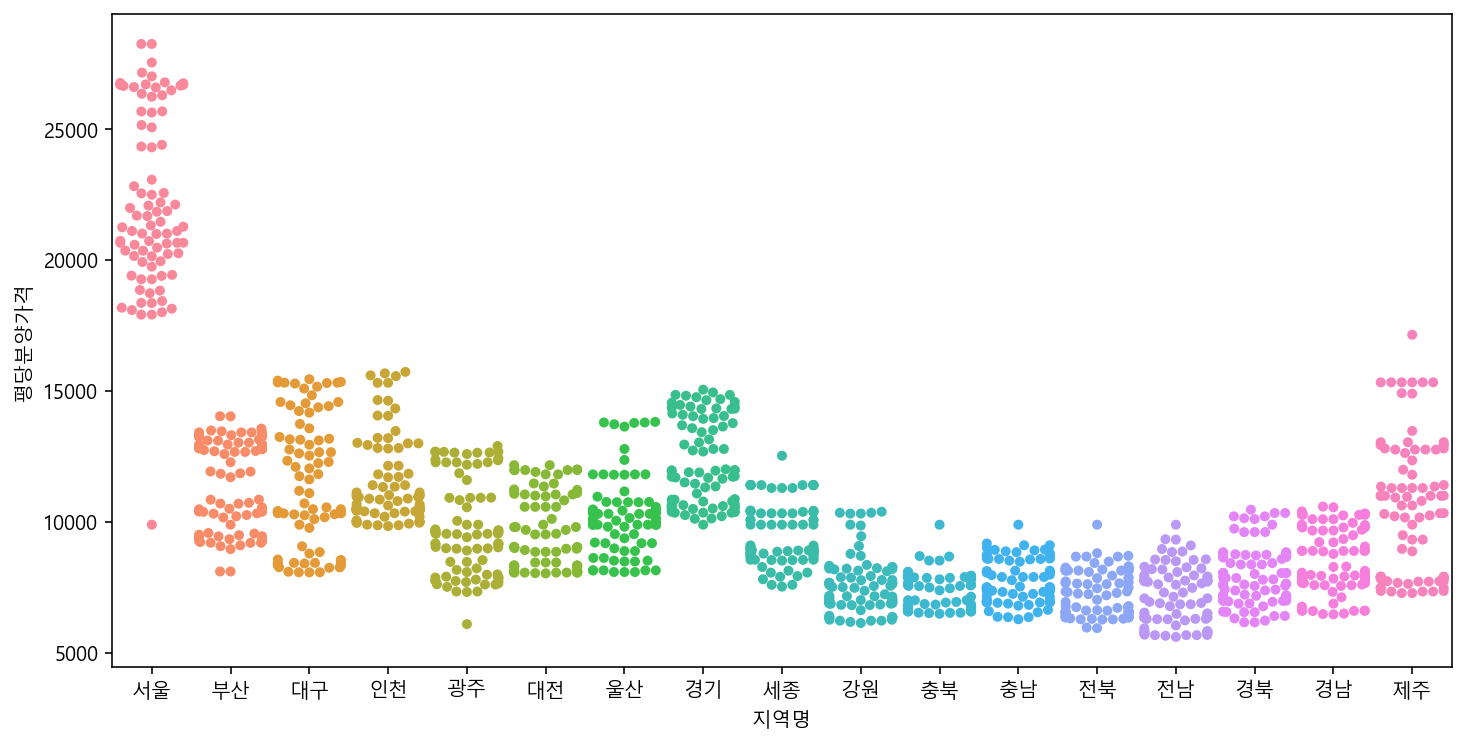

In [49]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='지역명', y='평당분양가격', data=result)

<Figure size 864x432 with 0 Axes>

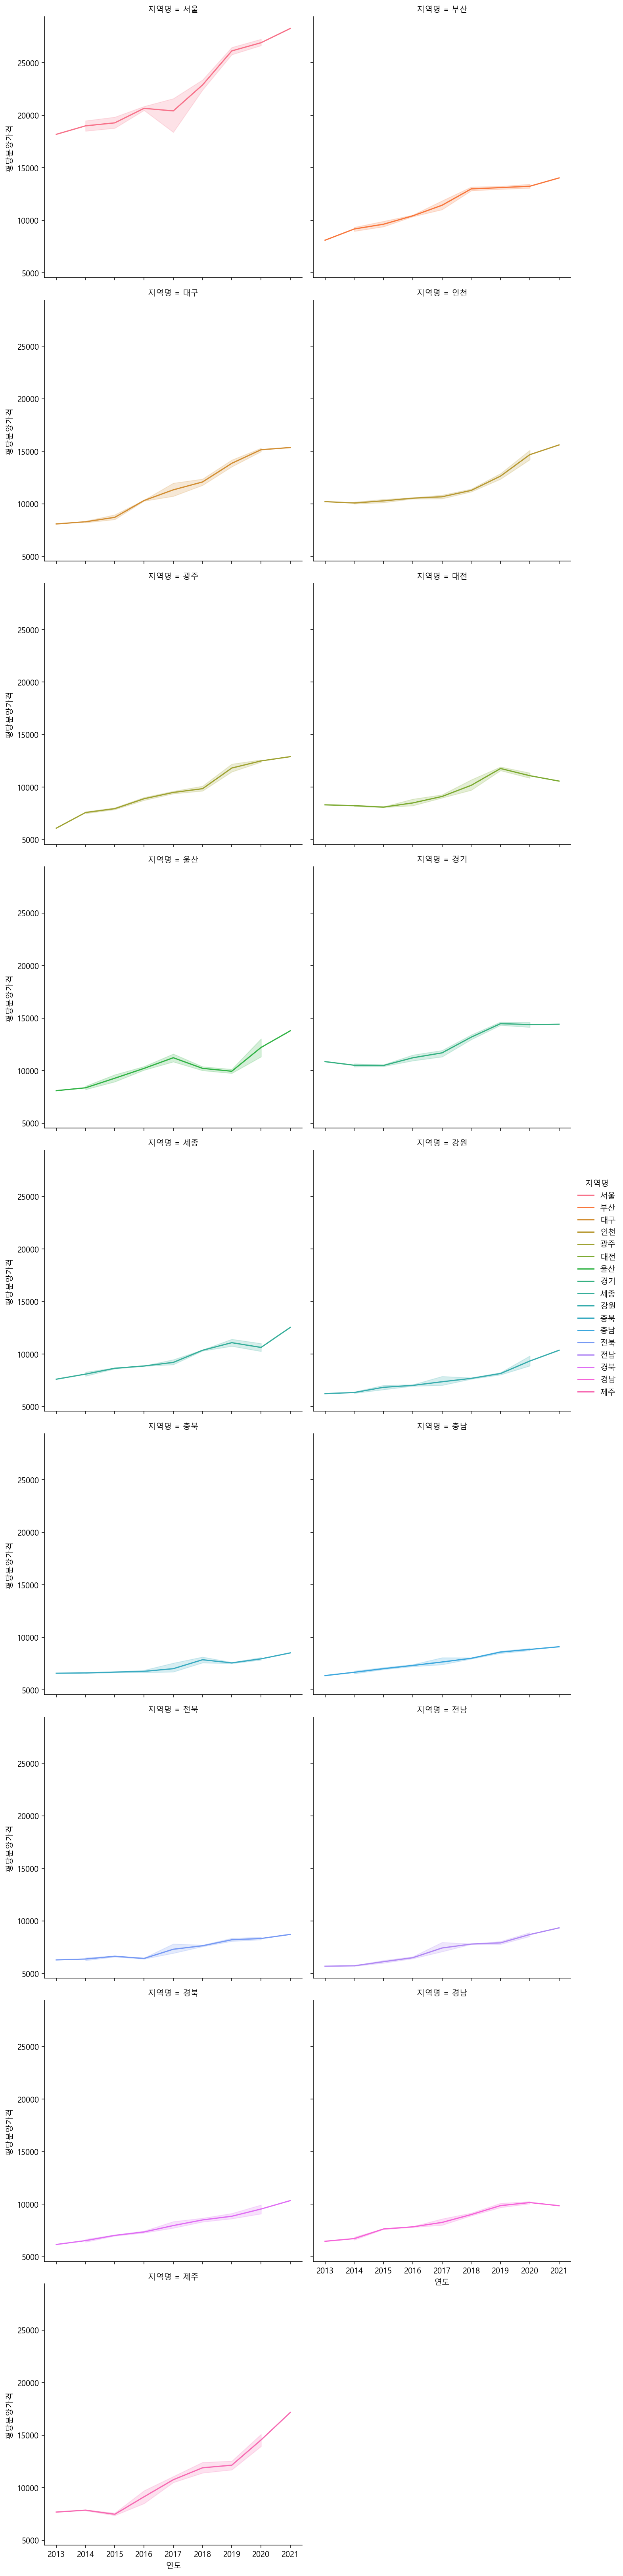

In [50]:
plt.figure(figsize=(12,6))
sns.relplot(kind='line', x="연도",y="평당분양가격",data=result, hue='지역명', col='지역명', col_wrap=2)

<Figure size 1080x216 with 0 Axes>

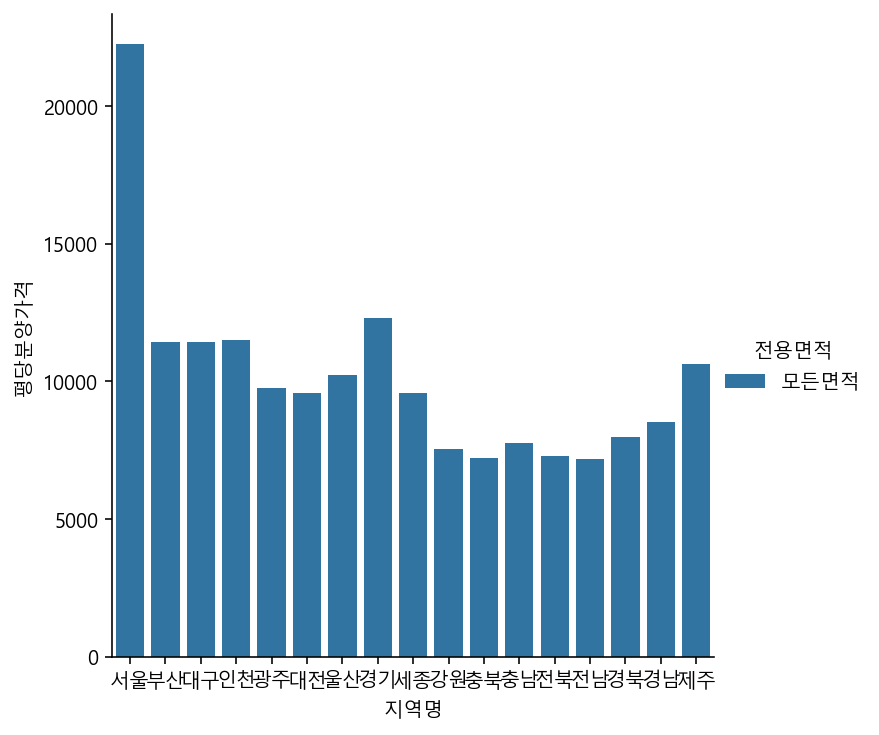

In [51]:
plt.figure(figsize=(15,3))
sns.catplot(x='지역명', y='평당분양가격', data=result, hue='전용면적', ci=None, kind='bar')

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

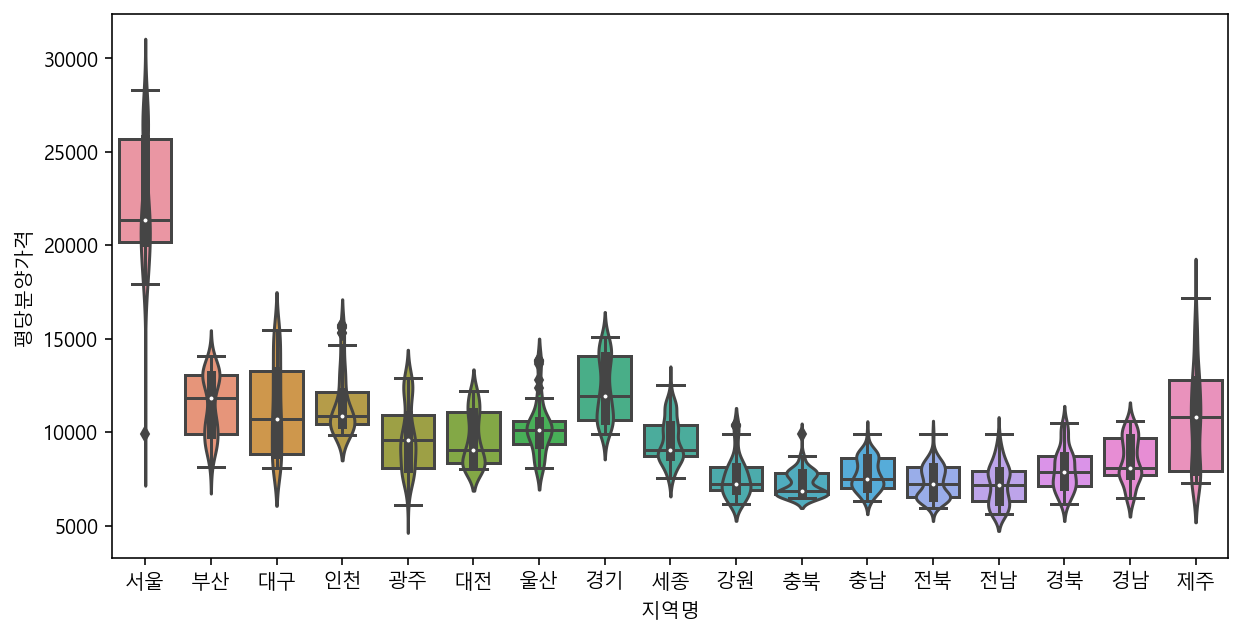

In [52]:
plt.figure(figsize=(10,5))
sns.boxplot(x='지역명', y='평당분양가격', data=result)
sns.violinplot(x='지역명', y='평당분양가격', data=result)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

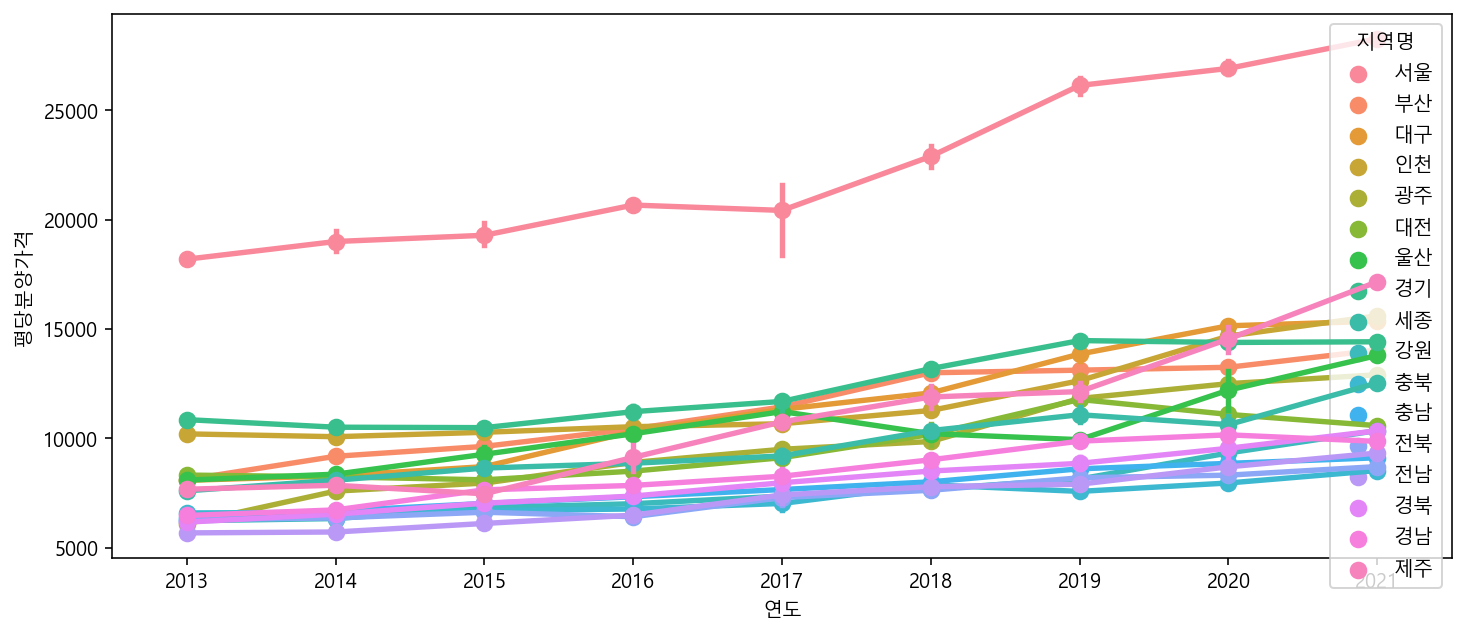

In [53]:
plt.figure(figsize=(12,5))
sns.pointplot(x='연도', y='평당분양가격', hue='지역명', data=result)

<AxesSubplot:xlabel='전용면적', ylabel='평당분양가격'>

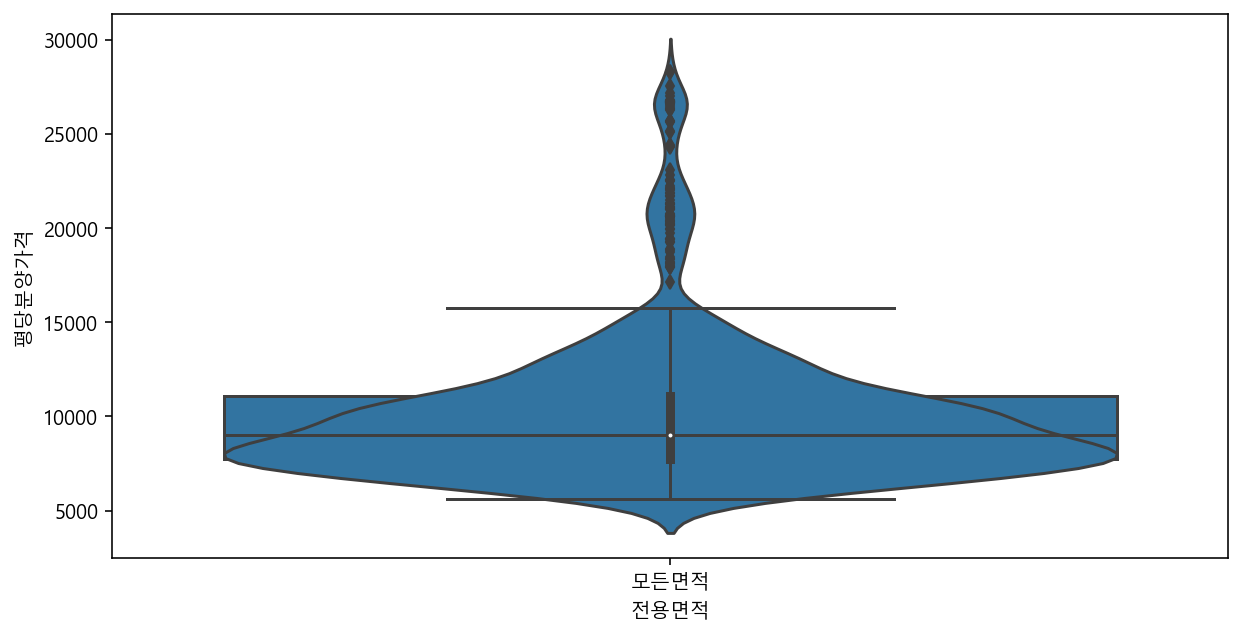

In [54]:
plt.figure(figsize=(10,5))
sns.boxplot(x='전용면적', y='평당분양가격', data=result)
sns.violinplot(x='전용면적', y='평당분양가격', data=result)

<Figure size 720x360 with 0 Axes>

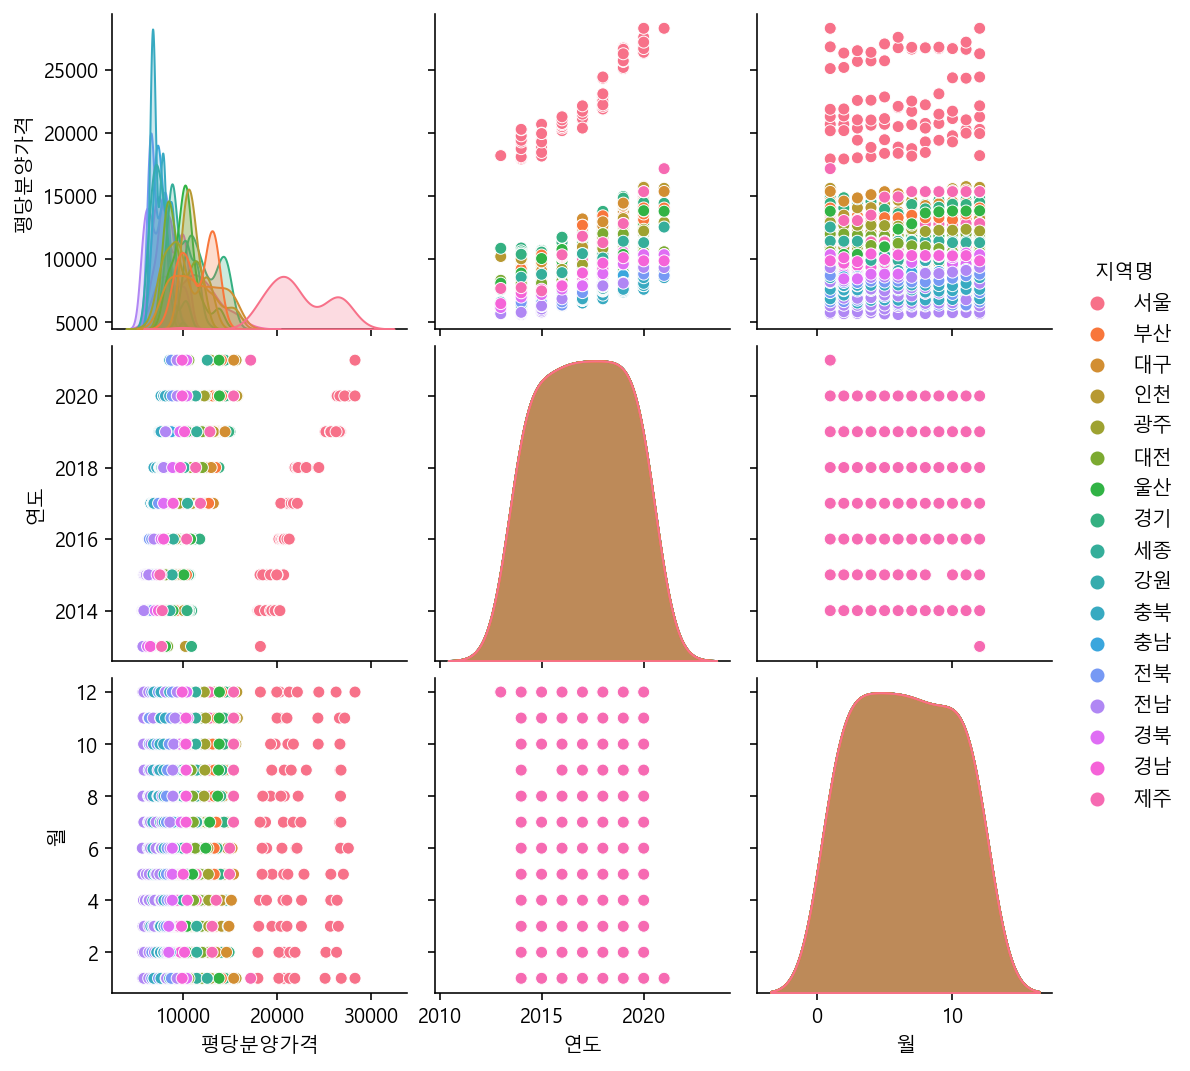

In [55]:
plt.figure(figsize=(10,5))
sns.pairplot(hue='지역명', data=result)

<Figure size 720x360 with 0 Axes>

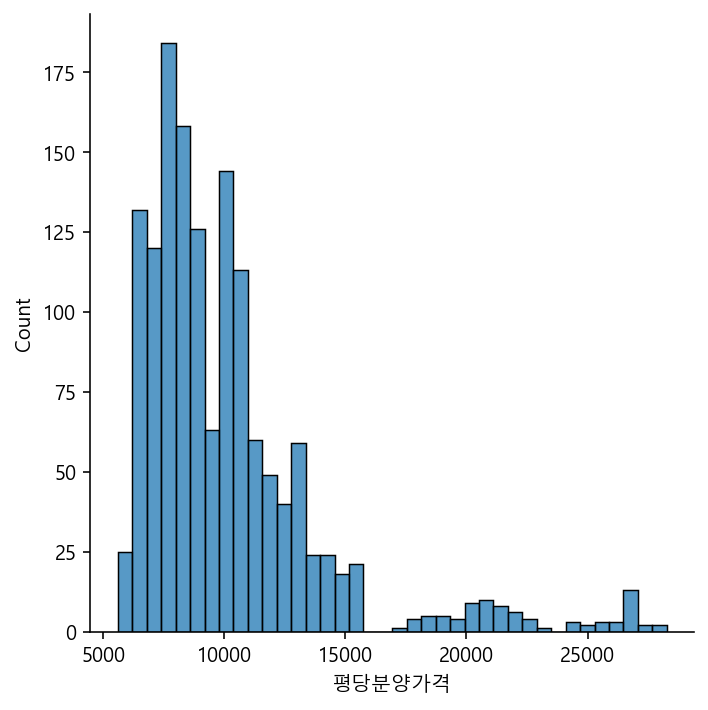

In [56]:
plt.figure(figsize=(10,5))
sns.displot(result['평당분양가격'])

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

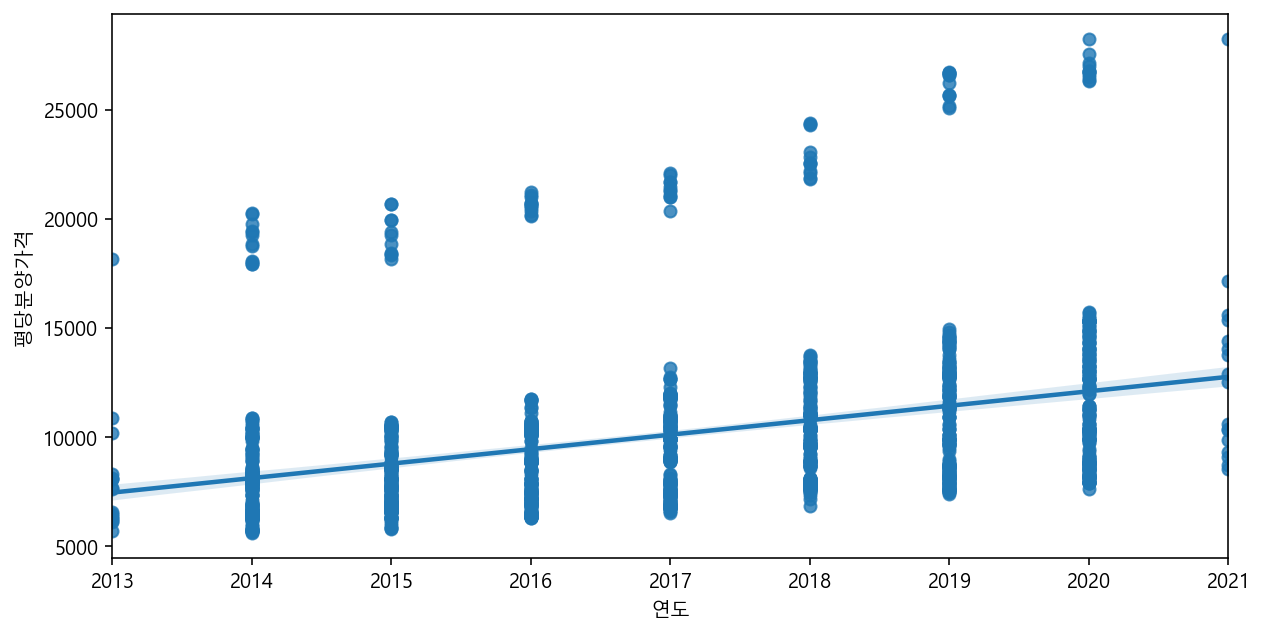

In [57]:
plt.figure(figsize=(10,5))
sns.regplot(x='연도', y='평당분양가격', data=result)

<AxesSubplot:>

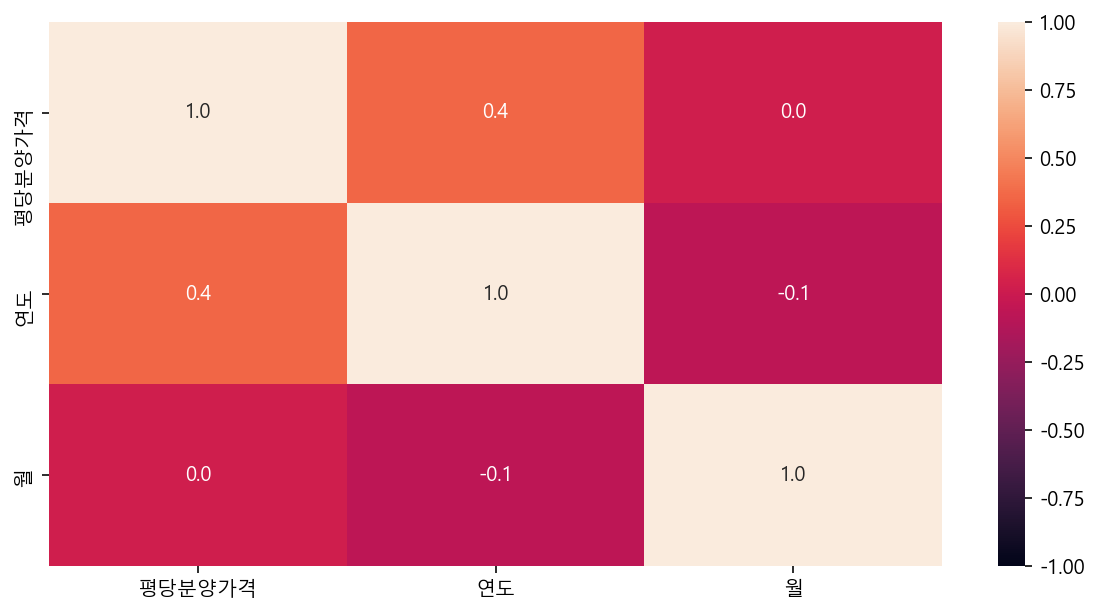

In [58]:
plt.figure(figsize=(10,5))
sns.heatmap(result.corr(), vmin=-1, vmax=1, annot=True, fmt=".1f")